<i><b><u>Note</u>:</b> Please use the "Outline" function to view the code notebook's structure and to navigate easier.
# <b> Corporate Credit Rating With Financial Ratios </b>

## Introduction and Motivation
<p>
Corporate credit ratings, issued by specialist agencies, provide an assessment about the credit worthiness of a company and acts as a pivotal financial indication to potential investors. It helps provide investors with a concrete idea about the risk associated with the company’s credit investment returns. Every company aims to attain a good credit rating for seeking more investment and lower debt interest rates.

<p>
This notebook present an end-to-end analysis on Corporate Credit Rating from a dataset obtained from Kaggle: <a href="https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-with-financial-ratios">link here</a>
</p>

## Outline
<p>Using a relatively straightforward Corporate Credit Rating dataset with financial ratios, we cover the following steps:</p>
<ul>
    <li>1. Project purposes</li>
    <li>2. Overview about dataset</li>
    <li>3. Preprocess data
        <ul>
            <li>3.1. Load data</li>
            <li>3.2. Data visualization and exploration</li>
            <li>3.3. Remove columns that aren't useful</li>
            <li>3.4. Convert categorical variables to numeric variables</li>
            <li>3.5. Split data into training and testing</li>
            <li>3.6. Handling missing values</li>
            <li>3.7. Data standardisation</li>
            <li>3.8. Looking at outliers</li>
            <li>3.9. Balancing the dataset</li>
        </ul>
    </li>
    <li>4. Predict Binary Rating using Classification models (include hyperparameter tuning)</li>
        <ul>
            <li>4.1. Logistics Regression</li>
            <li>4.2. K Nearest Neighbors (KNN)</li>
            <li>4.3. Decision Tree</li>
            <li>4.4. Gaussian Naive Bayes</li>
            <li>4.5. Random Forest</li>
            <li>4.6. Gradient Boosting</li>
            <li>4.7. Support Vector Machines (SVM)</li>
        </ul>
    <li>5. Enhance model performance with Cross Validation and Feature Selections</li>
    <li>6. Compare all models and results on most important features</li>
</ul>


## Project Purposes

<p>The purposes of this projects are:</p>
<ul>
    <li>Explore the relationships between features</li>
    <li>Find the most important factors which impact company's credit rating</li>
    <li>Build classification machine learning models to predict company's credit rating (Binary Rating) based on their financial performance</li>
    <li>Recommendations how to improve Credit Rate (from the company perspective) and how to recognize risky company (from the investors perspective)</li>
</ul>
<i><b><u>Note</u>: </b>
<ul>
    <li>Normally credit rating would rely on both financial and non-financial information. For the limitaion of this dataset, credit rating will be considered only by financial information. 
    <li>To simplifiy the problem but still meet the project objectives, the target column for modelling would be Binary Rating instead of Rating.<i>
</ul>

## Overview about dataset

<p>The dataset has 7805 rows which contain information on financial performance and credit rating of 678 companies from 2010 to 2016. There are 7 rating agencies. The dataset is obtained from Kaggle via <a href="https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-with-financial-ratios">this link</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("corporateCreditRatingWithFinancialRatios.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating Agency                  7805 non-null   object 
 1   Corporation                    7805 non-null   object 
 2   Rating                         7805 non-null   object 
 3   Rating Date                    7805 non-null   object 
 4   CIK                            7805 non-null   int64  
 5   Binary Rating                  7805 non-null   int64  
 6   SIC Code                       7805 non-null   float64
 7   Sector                         7805 non-null   object 
 8   Ticker                         7805 non-null   object 
 9   Current Ratio                  7805 non-null   float64
 10  Long-term Debt / Capital       7805 non-null   float64
 11  Debt/Equity Ratio              7805 non-null   float64
 12  Gross Margin                   7805 non-null   f

In [4]:
df["Ticker"].nunique()

678

In [5]:
df["Year"]=pd.to_datetime(df["Rating Date"]).apply(lambda x: x.year)

In [6]:
df["Year"].min(), df["Year"].max() 

(2010, 2016)

In [7]:
df["Rating Agency"].nunique()

7

## Prepocessing data

### Load data

In [8]:
df.head(5)

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Year
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333,2010
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132,2010
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231,2010
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999,2010
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174,2010


### Data visualization and exploration
<p>There are 26 features in the dataset, including 8 categorical variables and 18 continuous variables.</p>

In [9]:
df[["CIK","Binary Rating","SIC Code"]]=df[["CIK","Binary Rating","SIC Code"]].astype("str")

In [10]:
df["Rating Date"]=pd.to_datetime(df["Rating Date"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Rating Agency                  7805 non-null   object        
 1   Corporation                    7805 non-null   object        
 2   Rating                         7805 non-null   object        
 3   Rating Date                    7805 non-null   datetime64[ns]
 4   CIK                            7805 non-null   object        
 5   Binary Rating                  7805 non-null   object        
 6   SIC Code                       7805 non-null   object        
 7   Sector                         7805 non-null   object        
 8   Ticker                         7805 non-null   object        
 9   Current Ratio                  7805 non-null   float64       
 10  Long-term Debt / Capital       7805 non-null   float64       
 11  Debt/Equity Ratio

#### <b>Understand categorical variables</b>

<p>There are 1377 corporation's names, however some of them are of the same company (for example: "Westlake Chemical Corp." and "Westlake Chemical Corporation"). Therefore, we will not use this column for unique indentifier for company.
<p> SIC Code column (Standard Industrial Classification Codes) has 240 uniques values representing for 240 different business lines of the dataset.
<p> CIK and Ticker serve the same purpose of being the unique indentifier for company. We will use Ticker column for this purpose because it is easier to interpret compared to CIK.

In [12]:
from wordcloud import WordCloud

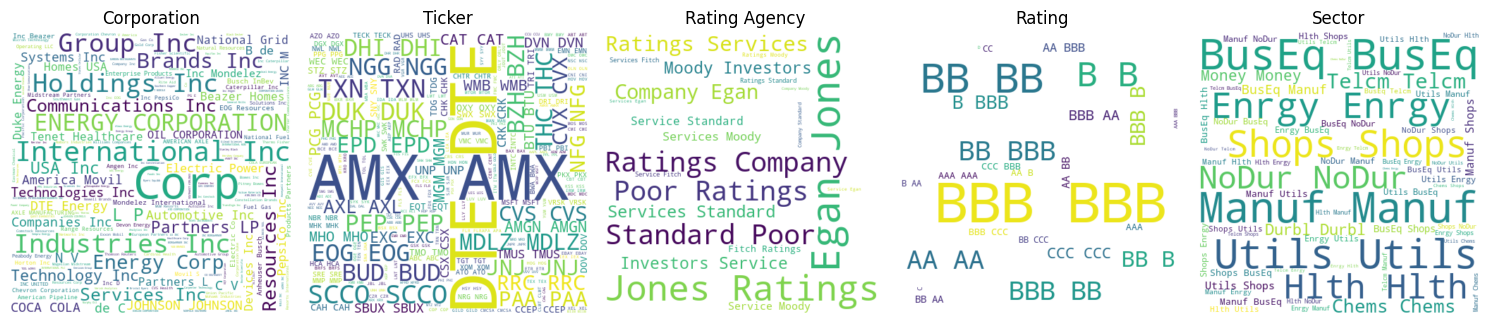

In [13]:
columns = ["Corporation", "Ticker", "Rating Agency", "Rating", "Sector"]

fig, axes = plt.subplots(1,5,figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(columns):
    text_to_visualize = " ".join(df[col].fillna("").astype(str).values)
    wordcloud = WordCloud(width=400, height=400, background_color="white").generate(text_to_visualize)
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [14]:
df[["Corporation","CIK","SIC Code","Ticker"]].nunique()

Corporation    1377
CIK             686
SIC Code        240
Ticker          678
dtype: int64

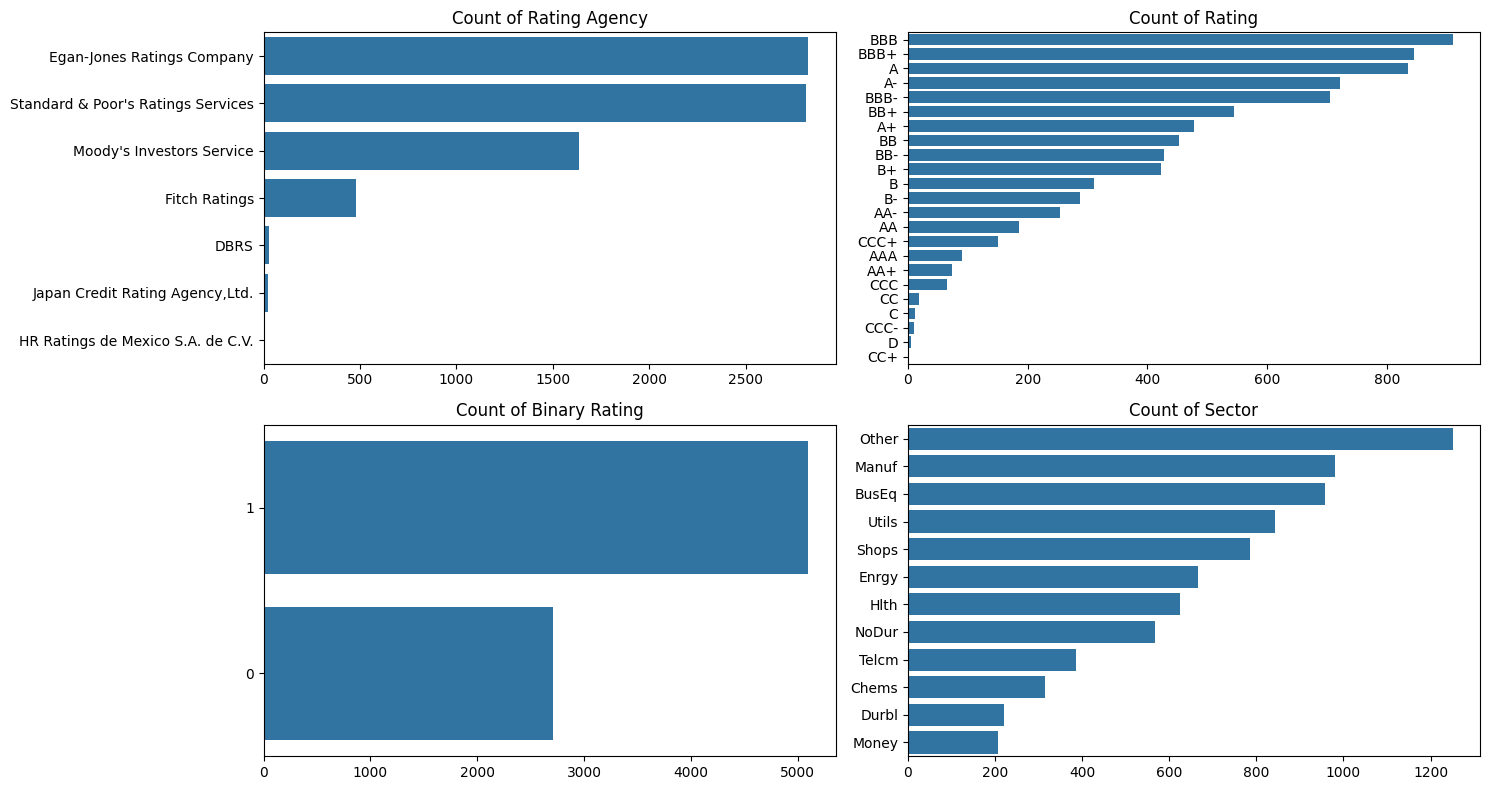

In [15]:
column_list = ["Rating Agency","Rating","Binary Rating","Sector"]

fig, axes = plt.subplots(2,2,figsize=(15,8))
axes = axes.flatten()

for i, col in enumerate(column_list):
    ax = axes[i]
    df1=df.groupby(col)[col].value_counts().reset_index().sort_values(by="count",ascending=False)
    sns.barplot(data=df1, x="count", y=col, ax=ax)
    ax.set_title("Count of "+col)
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()

#### <b> Understand continuous variables

In [16]:
df.describe()

,Rating Date,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Year
count,7805,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000
mean,2014-06-06 12:14:28.981421824,1.926313,0.452804,0.177349,42.433909,11.531612,11.582683,20.071493,8.659944,5.995566,0.849843,15.950507,21.481589,4.575705,7.076084,0.479756,0.119491,2013.915951
min,2010-04-06 00:00:00,0.174900,-86.363600,-1473.098000,-87.684000,-461.787800,-461.787800,-360.816900,-476.010000,-414.824800,0.068400,-11258.210000,-14023.260000,-226.442500,-745.454500,-91.330200,-130.665800,2010.000000
25%,2013-07-23 00:00:00,1.077300,0.286500,0.419700,22.453900,6.098200,6.181100,11.162100,4.008700,2.637100,0.399500,6.022800,-12.233900,2.391900,3.692600,-0.448500,-0.723700,2013.000000
50%,2014-07-23 00:00:00,1.496800,0.427200,0.752800,39.635400,12.120100,12.155800,18.304500,9.705100,6.938900,0.661200,12.500000,10.564100,4.767500,7.440800,0.237800,0.133500,2014.000000
75%,2015-07-02 00:00:00,2.161000,0.542200,1.211600,59.641700,19.464600,19.539900,30.661600,16.676900,12.366700,1.038800,20.515700,26.894100,7.881300,12.515100,1.088800,0.997800,2015.000000
max,2016-12-27 00:00:00,34.076800,171.500000,194.375000,100.000000,93.993000,93.993000,286.493500,221.289400,219.390300,8.503900,7038.461000,9882.979000,114.716900,466.666700,282.192100,107.737700,2016.000000
std,NaN,1.921651,2.629158,34.456334,23.742020,25.469044,25.483934,24.380407,27.866408,24.055577,0.696204,230.592526,462.734075,9.229899,24.382027,6.050626,7.253660,1.393717


In [17]:
df1=df.drop(columns=["Rating Agency","Corporation","Rating","Rating Date","CIK","SIC Code","Sector","Ticker"])
fig = px.imshow(df1.corr(),
                x=df1.corr().columns,
                y=df1.corr().columns,
                text_auto=True,
                color_continuous_scale='RdBu_r',
                aspect="auto")
fig.show()

#Moderate correlation with Binary Ratio: Current Ratio, all Margin ratios, ROA, ROI

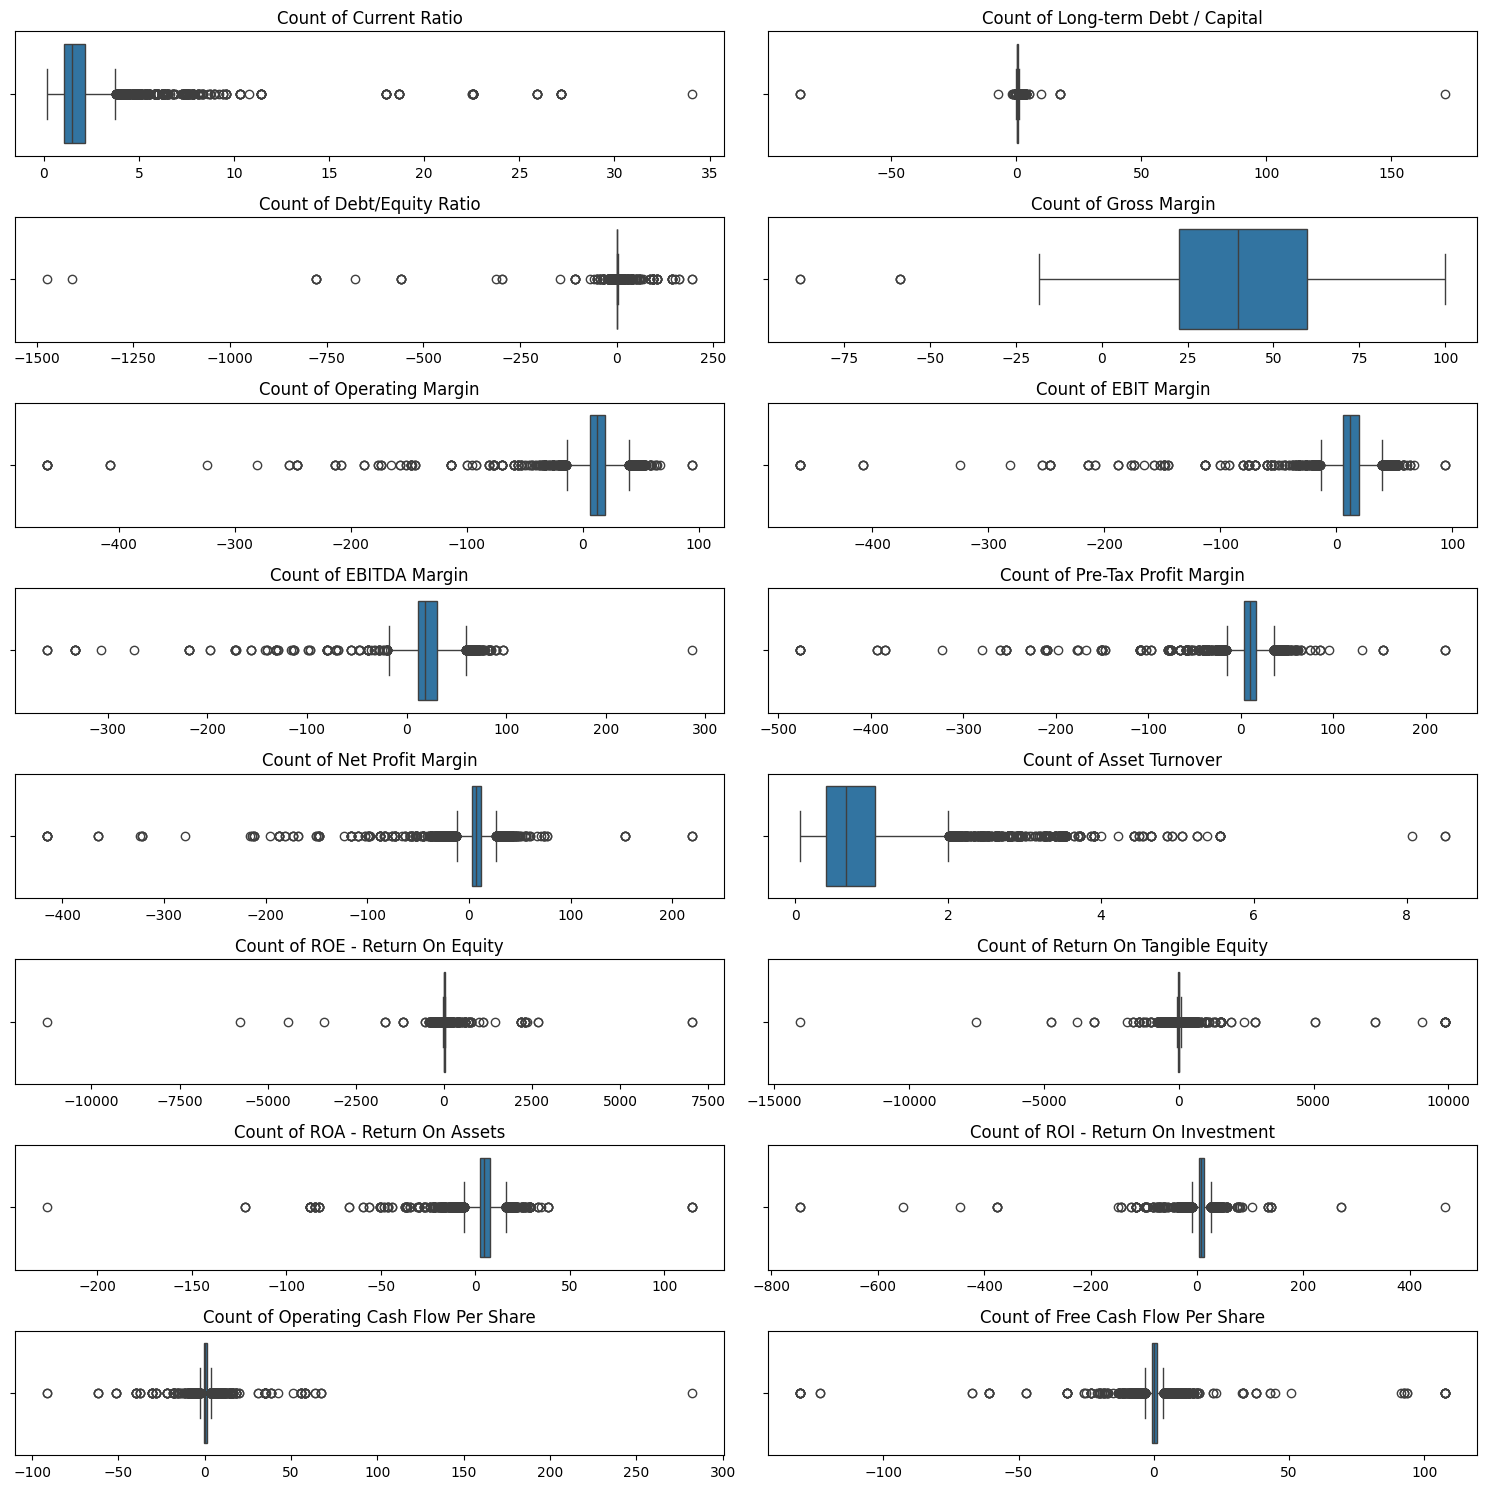

In [18]:
exclude_column = ["Rating Agency","Rating","Binary Rating","Sector","Corporation","CIK","SIC Code","Ticker","Rating Date","Year"]
column_list = df.columns.tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(8,2,figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.boxplot(data=df,x=col,ax=ax)
  ax.set_title("Count of "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

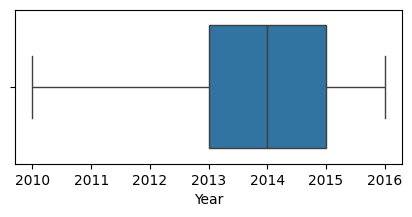

In [19]:
plt.figure(figsize=(5, 2))
sns.boxplot(data=df, x="Year")
plt.show()

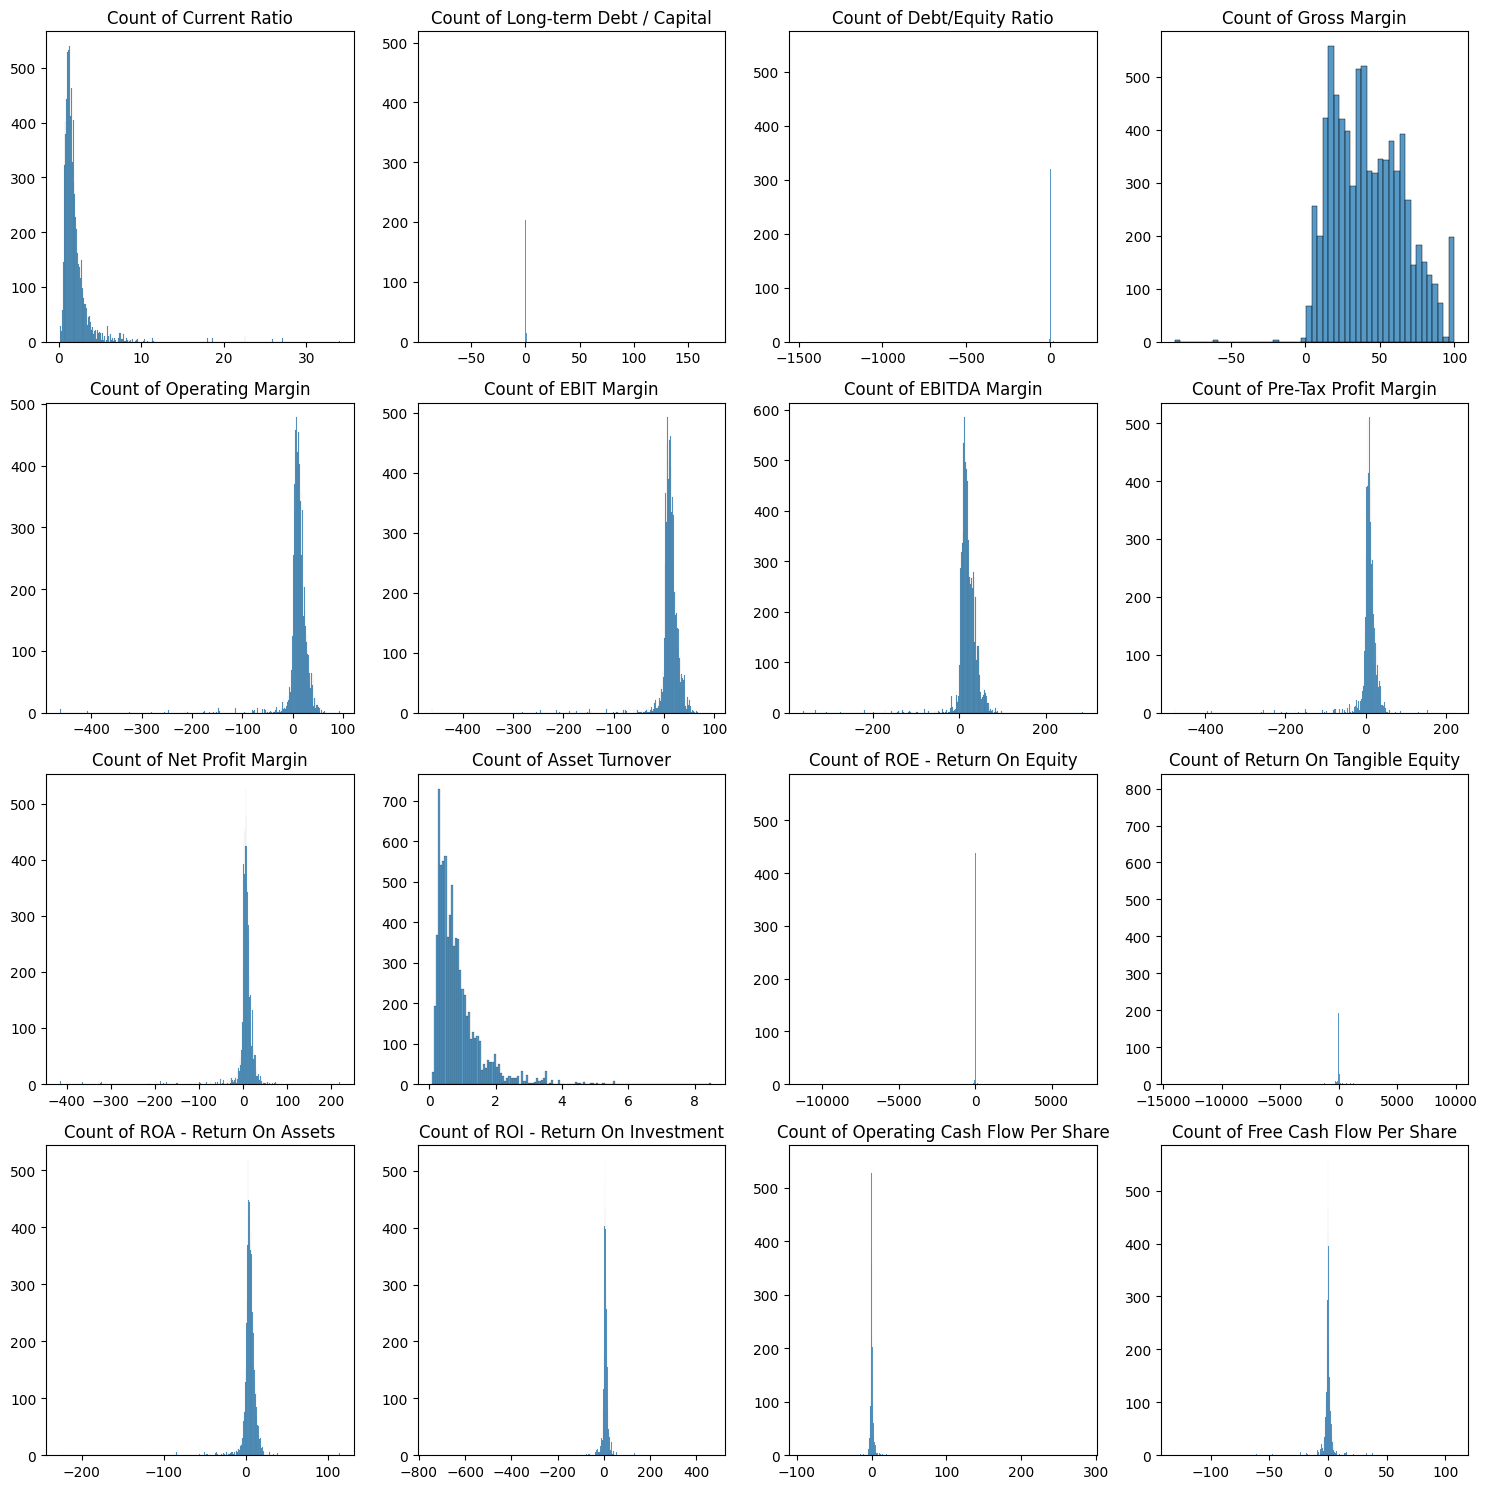

In [20]:
exclude_column = ["Rating Agency","Rating","Binary Rating","Sector","Corporation","CIK","SIC Code","Ticker","Rating Date","Year"]
column_list = df.columns.tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(4,4,figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.histplot(data=df,x=col,ax=ax)
  ax.set_title("Count of "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

#### <b> Relationship between Binary Rating vs other categorical variables

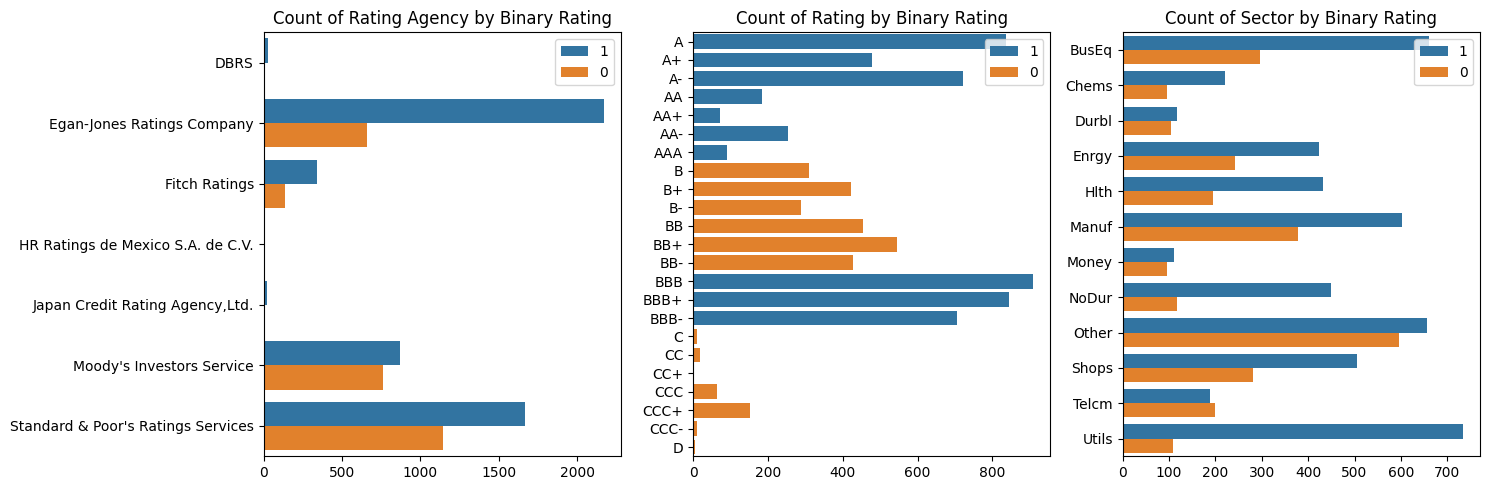

In [21]:
column_list = ["Rating Agency","Rating","Sector"]

fig, axes = plt.subplots(1,3,figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(column_list):
    ax = axes[i]
    sns.countplot(data=df.sort_values(by=col), y=col, hue="Binary Rating", ax=ax)
    ax.set_title("Count of "+col+" by Binary Rating")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend(loc='upper right')
plt.tight_layout()

#### <b> Relationship between Binary Rating vs other continuous variables

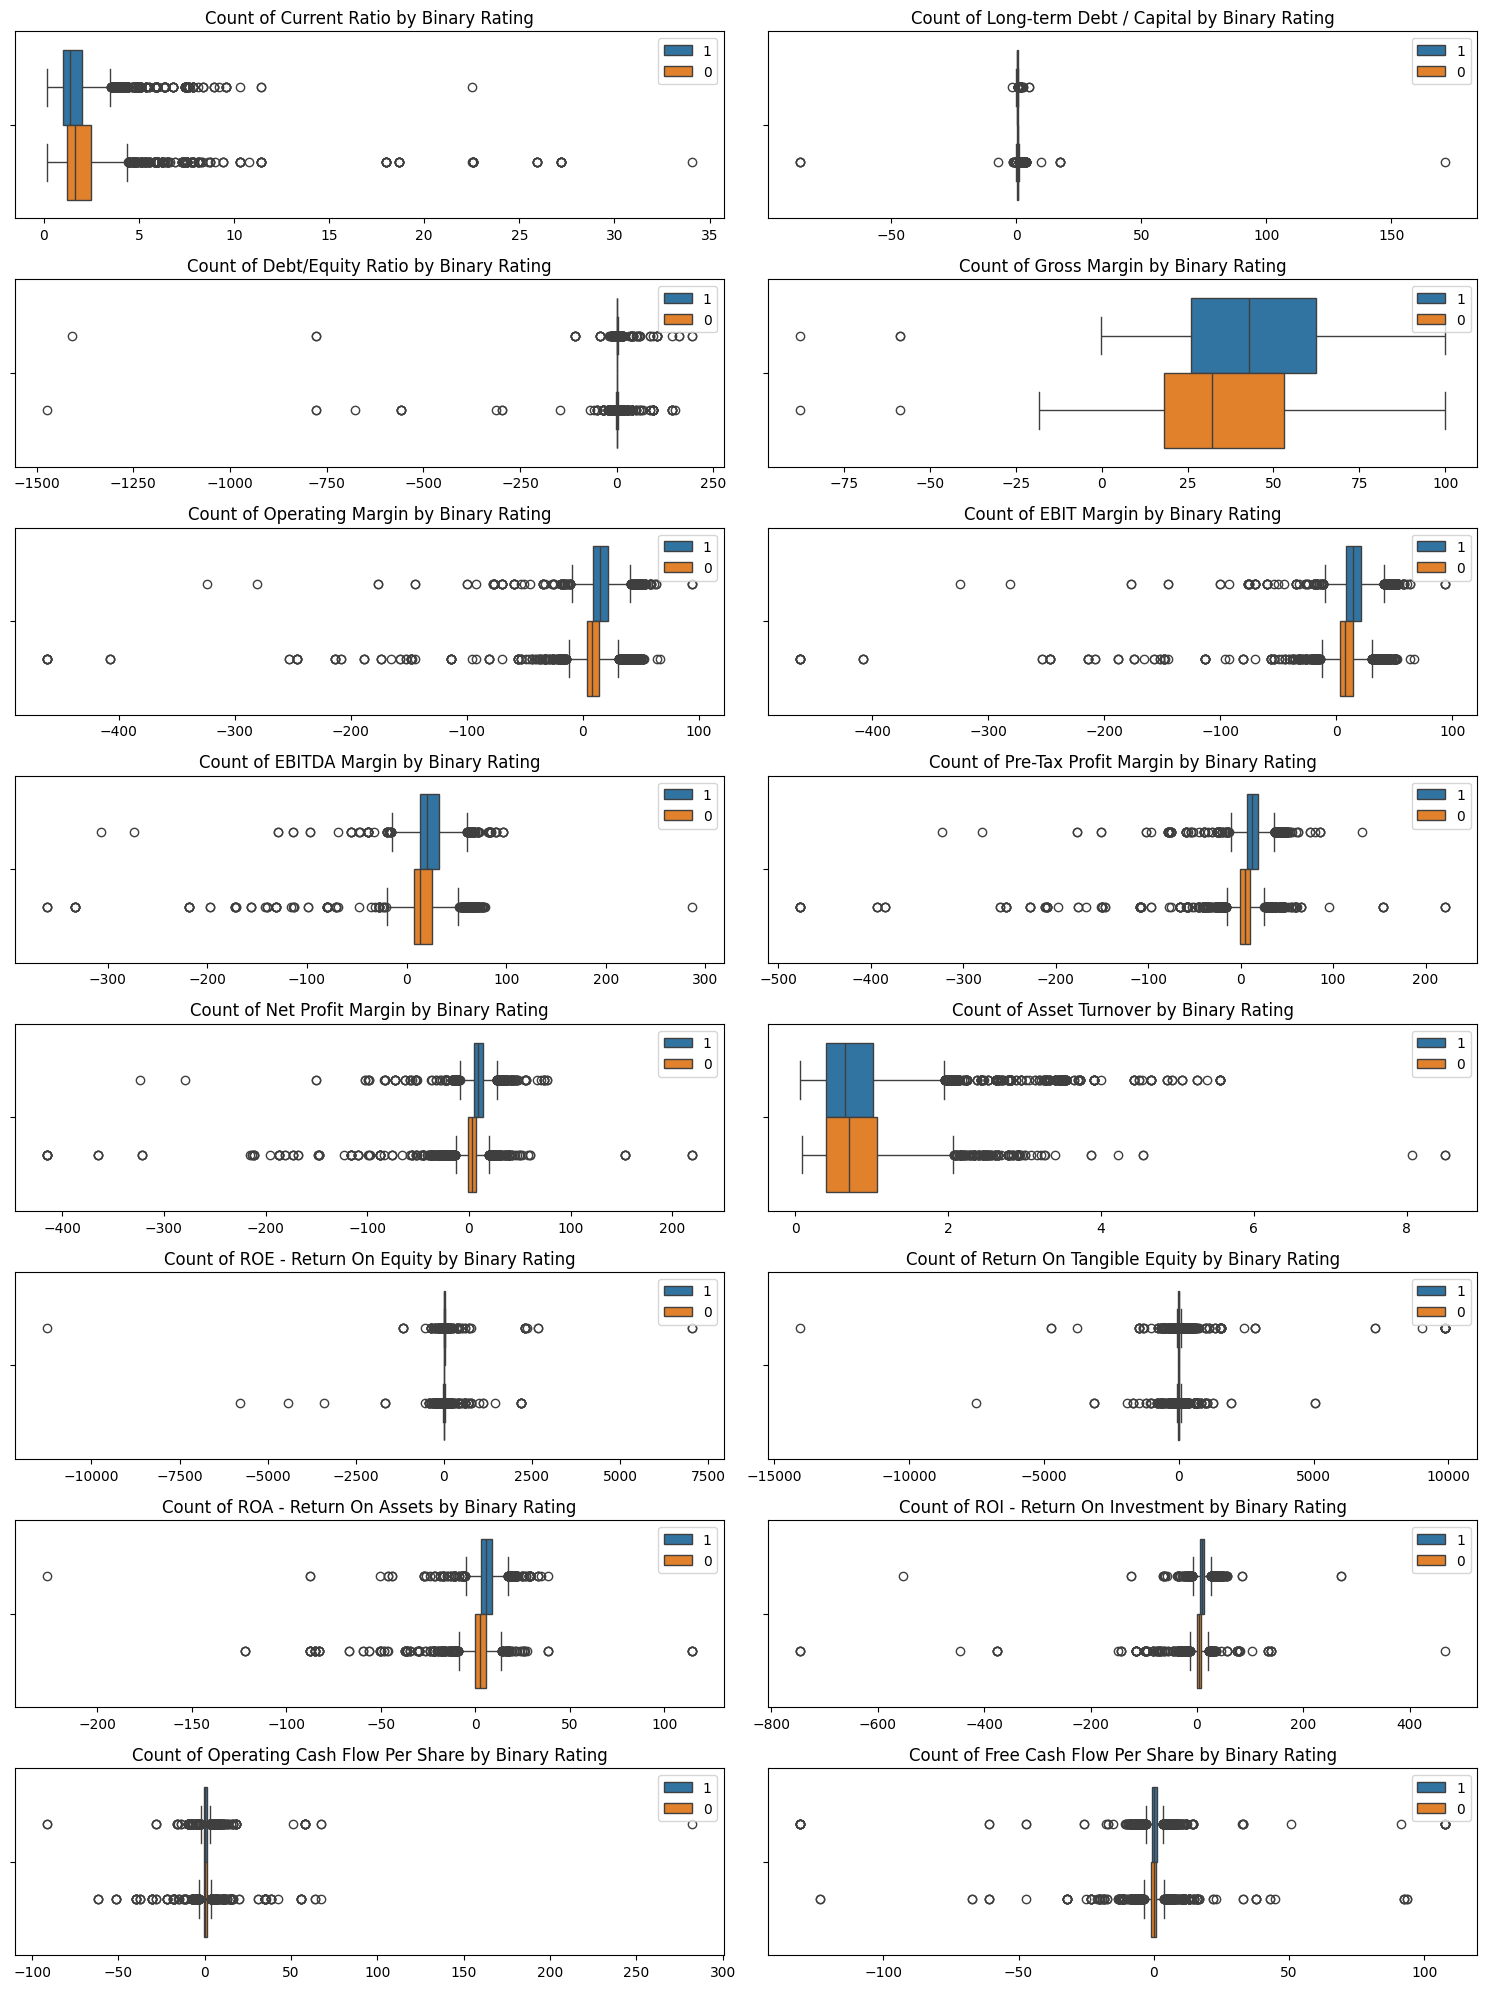

In [22]:
exclude_column = ["Rating Agency","Corporation","Rating","Rating Date","CIK","SIC Code","Sector","Ticker","Year","Binary Rating"]
column_list = df.columns.tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(8,2,figsize=(15,20))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.boxplot(data=df,x=col,hue="Binary Rating",ax=ax)
  ax.set_title("Count of "+col+" by Binary Rating")
  ax.set_xlabel("")
  ax.set_ylabel("")
  ax.legend(loc='upper right')
plt.tight_layout()

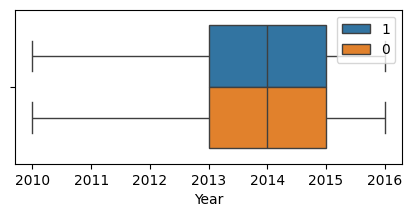

In [23]:
plt.figure(figsize=(5,2))
sns.boxplot(data=df,x="Year",hue="Binary Rating")
plt.legend(loc='upper right')
plt.show()

#### Financial performance by Sector

In [24]:
df["Sector"].value_counts()

Sector
Other    1251
Manuf     981
BusEq     958
Utils     843
Shops     786
Enrgy     665
Hlth      625
NoDur     567
Telcm     386
Chems     315
Durbl     221
Money     207
Name: count, dtype: int64

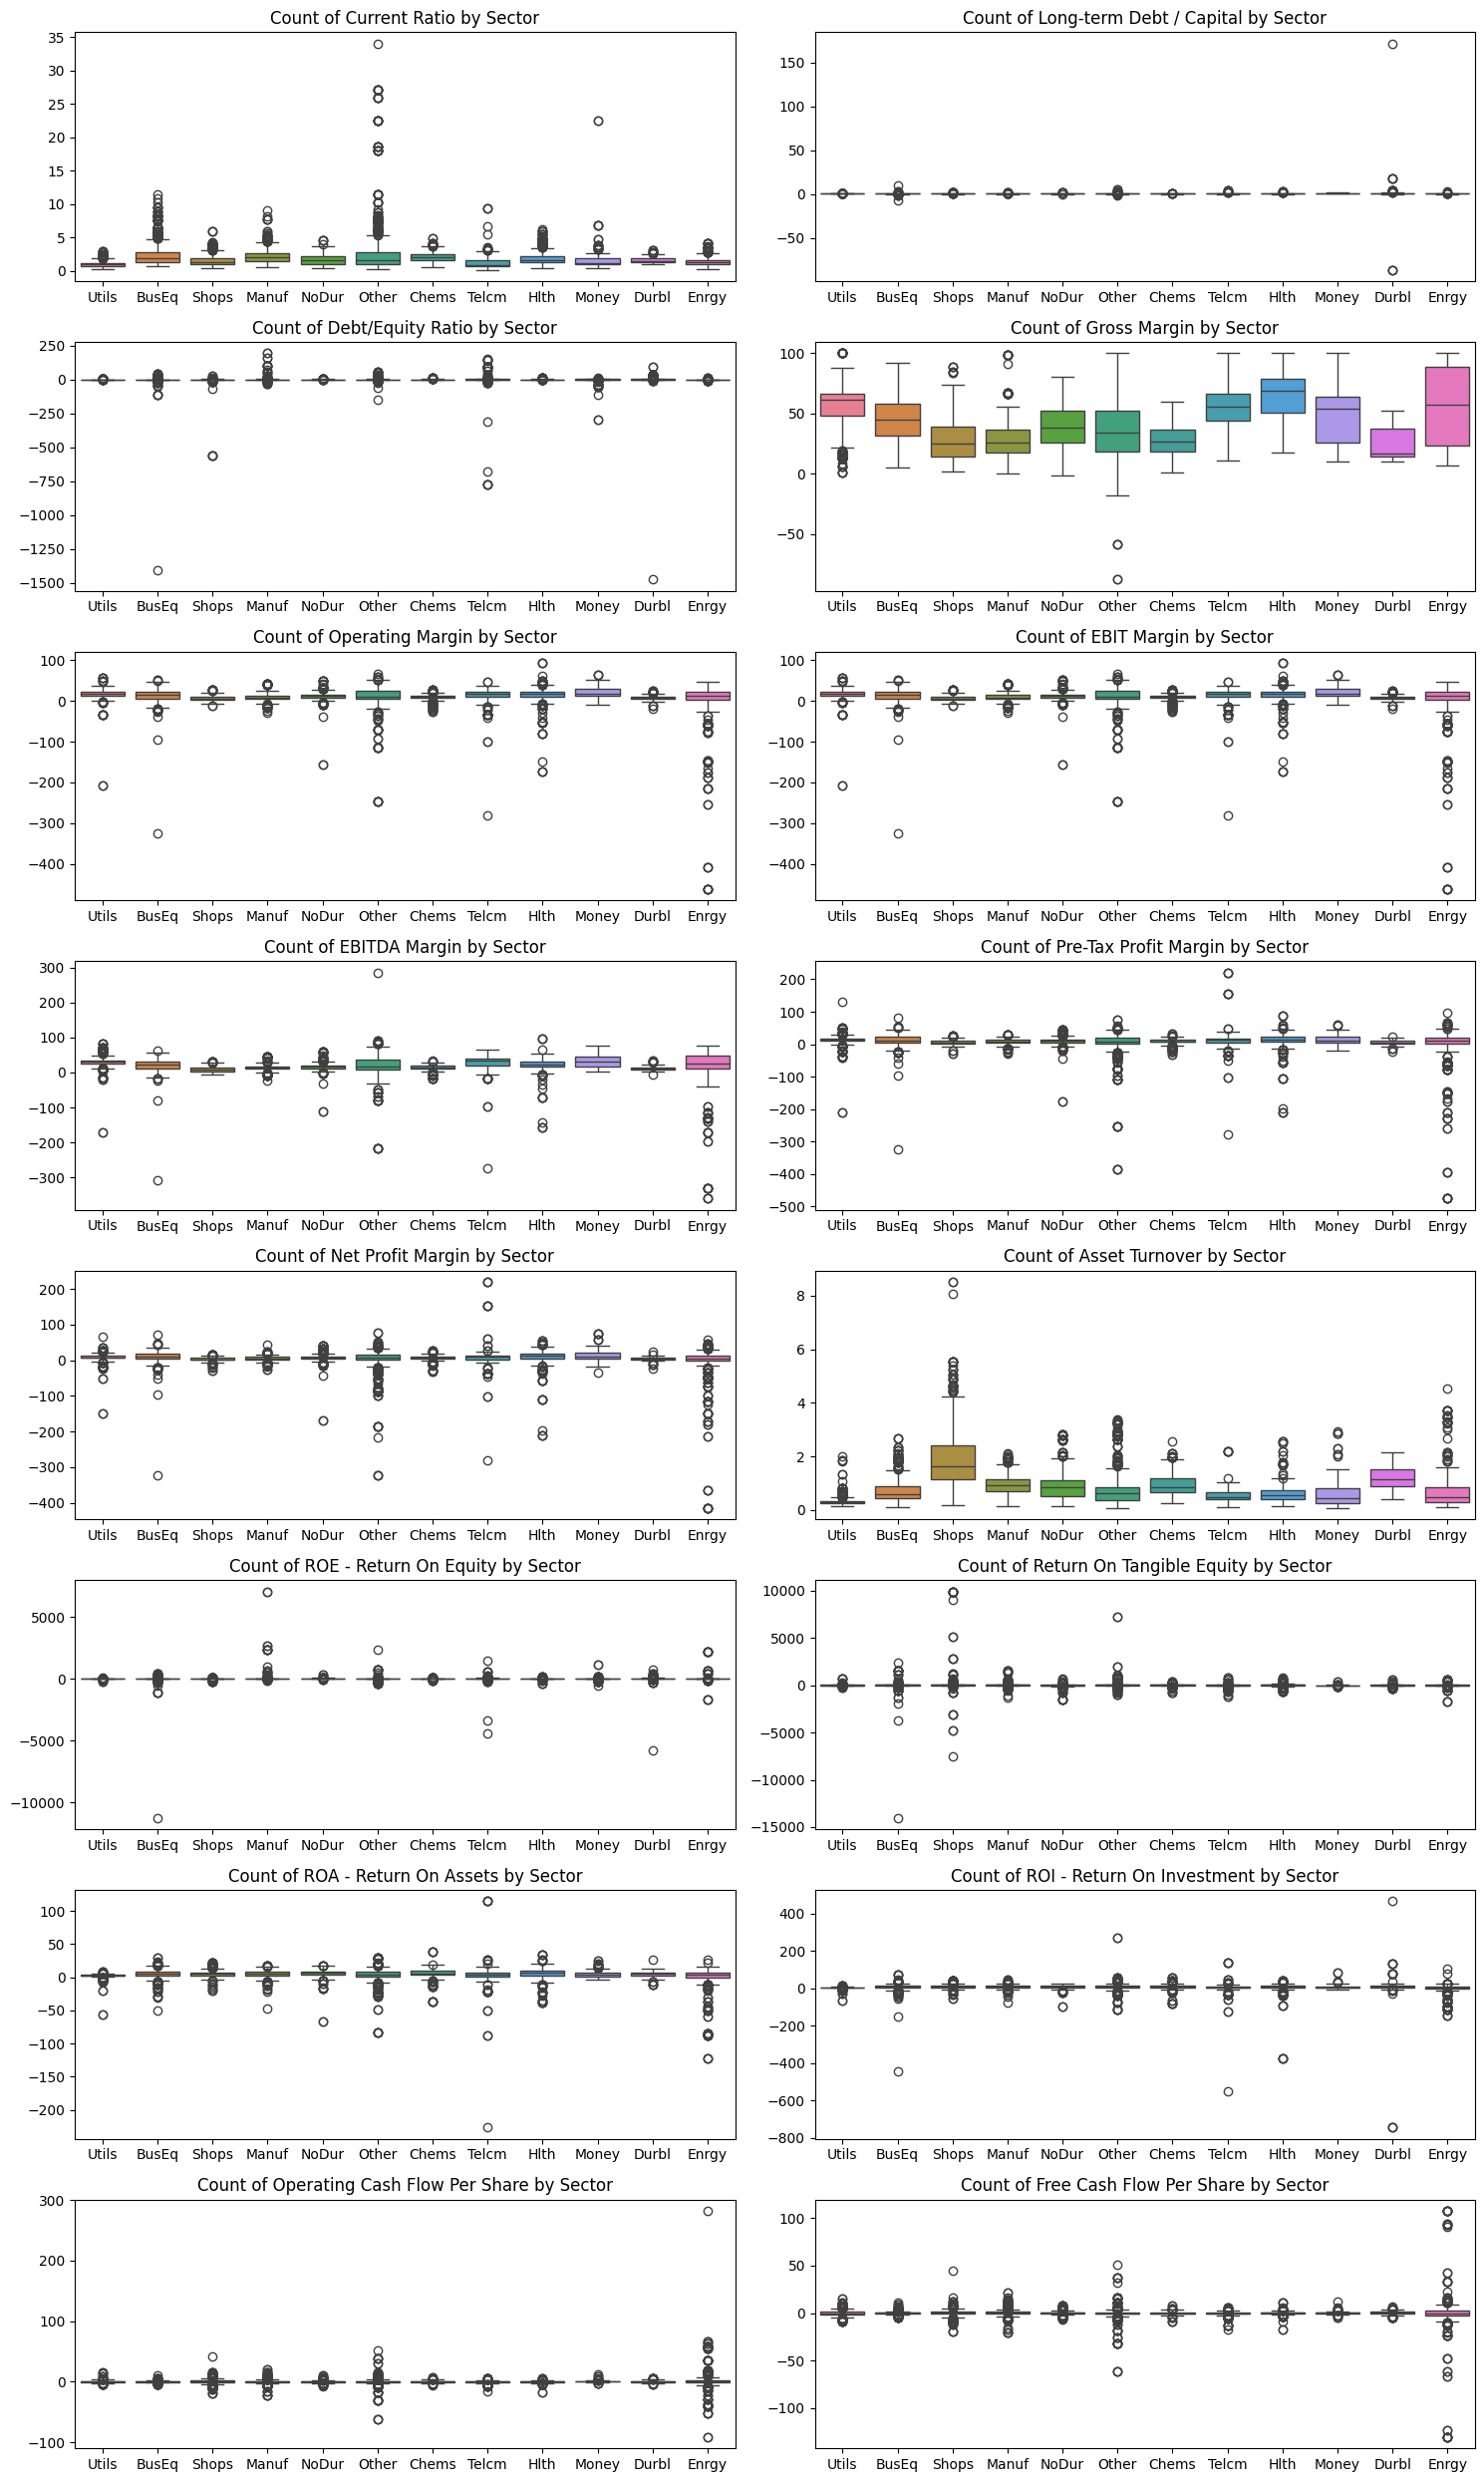

In [25]:
exclude_column = ["Rating Agency","Corporation","Rating","Rating Date","CIK","SIC Code","Ticker","Year","Binary Rating","Sector"]
column_list = df.columns.tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(8,2,figsize=(15,25))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.boxplot(data=df,y=col,x="Sector",hue="Sector",ax=ax)
  ax.set_title("Count of "+col+" by Sector")
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

### Remove columns that arent useful
<p> Remove all columns that are unique for each company.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Rating Agency                  7805 non-null   object        
 1   Corporation                    7805 non-null   object        
 2   Rating                         7805 non-null   object        
 3   Rating Date                    7805 non-null   datetime64[ns]
 4   CIK                            7805 non-null   object        
 5   Binary Rating                  7805 non-null   object        
 6   SIC Code                       7805 non-null   object        
 7   Sector                         7805 non-null   object        
 8   Ticker                         7805 non-null   object        
 9   Current Ratio                  7805 non-null   float64       
 10  Long-term Debt / Capital       7805 non-null   float64       
 11  Debt/Equity Ratio

In [27]:
df=df.drop(columns=["Rating Agency","Corporation","Rating","Rating Date","CIK","SIC Code","Ticker","Year"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Binary Rating                  7805 non-null   object 
 1   Sector                         7805 non-null   object 
 2   Current Ratio                  7805 non-null   float64
 3   Long-term Debt / Capital       7805 non-null   float64
 4   Debt/Equity Ratio              7805 non-null   float64
 5   Gross Margin                   7805 non-null   float64
 6   Operating Margin               7805 non-null   float64
 7   EBIT Margin                    7805 non-null   float64
 8   EBITDA Margin                  7805 non-null   float64
 9   Pre-Tax Profit Margin          7805 non-null   float64
 10  Net Profit Margin              7805 non-null   float64
 11  Asset Turnover                 7805 non-null   float64
 12  ROE - Return On Equity         7805 non-null   f

### Convert categorical variables to numeric variables
<p> We will convert Sector column into numeric variables because in reality company's sector will impact its credit rating. Financial performance will vary depend not only on the company itself but also on its sector. In this dataset, the visualization of the financial performance by sector did not provide a straigthforward director to group Sectors, therefore, instead of relying on a single financial ratio, we consider creating a composite score that combines several ratios. This could provide a more comprehensive view of each sector's financial performance.

In [29]:
df["Binary Rating"]=df["Binary Rating"].astype("int64")

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

# Standardize the financial ratios
df_standardized = scaler.fit_transform(df.drop(columns=["Binary Rating","Sector"]))

# Convert the standardized ratios back to a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=df.drop(columns=["Binary Rating","Sector"]).columns)

In [32]:
# Calculate the Composite Financial Performance Score for each company
df['Company Composite Score']=df_standardized.mean(axis=1)

In [33]:
df

,Binary Rating,Sector,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Company Composite Score
0,1,Utils,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333,0.089565
1,1,BusEq,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132,0.058825
2,1,Shops,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231,-0.181747
3,1,Utils,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999,0.033911
4,1,Shops,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174,0.137055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,1,BusEq,3.4927,0.5065,1.0263,79.3878,25.5703,25.5703,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826,0.348074
7801,1,BusEq,3.4927,0.5065,1.0263,79.3878,25.5703,25.5703,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826,0.348074
7802,0,Telcm,1.7606,0.1034,0.1523,54.2787,14.2454,14.2454,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552,0.061501
7803,0,Telcm,1.7606,0.1034,0.1523,54.2787,14.2454,14.2454,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552,0.061501


In [34]:
# Calculate the median composite score by sector, use median because this dataset has many outliers
sector_composite_score_df = df.groupby('Sector')['Company Composite Score'].median().reset_index().rename(columns={"Company Composite Score":"Sector Composite Score"})
sector_composite_score_df

,Sector,Sector Composite Score
0,BusEq,0.053083
1,Chems,-0.017246
2,Durbl,-0.018821
3,Enrgy,0.019538
4,Hlth,0.115940
5,Manuf,-0.048924
6,Money,0.027254
7,NoDur,0.024144
8,Other,0.006723
9,Shops,-0.003519


In [35]:
# Overall median composite score across all sectors
sector_composite_score_df["overall_composite_score"] = df['Company Composite Score'].median()
sector_composite_score_df

,Sector,Sector Composite Score,overall_composite_score
0,BusEq,0.053083,0.017271
1,Chems,-0.017246,0.017271
2,Durbl,-0.018821,0.017271
3,Enrgy,0.019538,0.017271
4,Hlth,0.115940,0.017271
5,Manuf,-0.048924,0.017271
6,Money,0.027254,0.017271
7,NoDur,0.024144,0.017271
8,Other,0.006723,0.017271
9,Shops,-0.003519,0.017271


In [36]:
sector_composite_score_df["Financial Performance"]=np.where(sector_composite_score_df["Sector Composite Score"]>sector_composite_score_df["overall_composite_score"], 1, 0)
sector_composite_score_df

,Sector,Sector Composite Score,overall_composite_score,Financial Performance
0,BusEq,0.053083,0.017271,1
1,Chems,-0.017246,0.017271,0
2,Durbl,-0.018821,0.017271,0
3,Enrgy,0.019538,0.017271,1
4,Hlth,0.115940,0.017271,1
5,Manuf,-0.048924,0.017271,0
6,Money,0.027254,0.017271,1
7,NoDur,0.024144,0.017271,1
8,Other,0.006723,0.017271,0
9,Shops,-0.003519,0.017271,0


In [37]:
df=pd.merge(df.drop(columns="Company Composite Score"), sector_composite_score_df.drop(columns=["Sector Composite Score","overall_composite_score"]), on="Sector", how="outer")

In [38]:
df["Financial Performance"].value_counts()

Financial Performance
1    4251
0    3554
Name: count, dtype: int64

In [39]:
df=df.drop(columns="Sector")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Binary Rating                  7805 non-null   int64  
 1   Current Ratio                  7805 non-null   float64
 2   Long-term Debt / Capital       7805 non-null   float64
 3   Debt/Equity Ratio              7805 non-null   float64
 4   Gross Margin                   7805 non-null   float64
 5   Operating Margin               7805 non-null   float64
 6   EBIT Margin                    7805 non-null   float64
 7   EBITDA Margin                  7805 non-null   float64
 8   Pre-Tax Profit Margin          7805 non-null   float64
 9   Net Profit Margin              7805 non-null   float64
 10  Asset Turnover                 7805 non-null   float64
 11  ROE - Return On Equity         7805 non-null   float64
 12  Return On Tangible Equity      7805 non-null   f

### Split data into training and testing

In [41]:
X=df.drop(columns="Binary Rating")
Y=df[["Binary Rating"]]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=100, shuffle=True,test_size=0.2)

### Handling missing values

In [43]:
#There is no missing value in the dataset
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6244 entries, 5737 to 5640
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Current Ratio                  6244 non-null   float64
 1   Long-term Debt / Capital       6244 non-null   float64
 2   Debt/Equity Ratio              6244 non-null   float64
 3   Gross Margin                   6244 non-null   float64
 4   Operating Margin               6244 non-null   float64
 5   EBIT Margin                    6244 non-null   float64
 6   EBITDA Margin                  6244 non-null   float64
 7   Pre-Tax Profit Margin          6244 non-null   float64
 8   Net Profit Margin              6244 non-null   float64
 9   Asset Turnover                 6244 non-null   float64
 10  ROE - Return On Equity         6244 non-null   float64
 11  Return On Tangible Equity      6244 non-null   float64
 12  ROA - Return On Assets         6244 non-null   flo

In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1561 entries, 4161 to 1435
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Current Ratio                  1561 non-null   float64
 1   Long-term Debt / Capital       1561 non-null   float64
 2   Debt/Equity Ratio              1561 non-null   float64
 3   Gross Margin                   1561 non-null   float64
 4   Operating Margin               1561 non-null   float64
 5   EBIT Margin                    1561 non-null   float64
 6   EBITDA Margin                  1561 non-null   float64
 7   Pre-Tax Profit Margin          1561 non-null   float64
 8   Net Profit Margin              1561 non-null   float64
 9   Asset Turnover                 1561 non-null   float64
 10  ROE - Return On Equity         1561 non-null   float64
 11  Return On Tangible Equity      1561 non-null   float64
 12  ROA - Return On Assets         1561 non-null   flo

In [45]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6244 entries, 5737 to 5640
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Binary Rating  6244 non-null   int64
dtypes: int64(1)
memory usage: 97.6 KB


In [46]:
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1561 entries, 4161 to 1435
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Binary Rating  1561 non-null   int64
dtypes: int64(1)
memory usage: 24.4 KB


### Data standardisation

<p> We use MinMaxScaler for this dataset because it translates each individual features into a same range 0 to 1, which is highly
beneficial for distance-based algorithms like KNN, which is also used in this project.

In [47]:
from sklearn.preprocessing import MinMaxScaler
#Create new instance
scaler=MinMaxScaler()
#Fit the scaler into training set and use it to transform the testing set
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Looking at outliers

<p> There are many outliers in this dataset as we can see from the EDA, this is reasonable because companies are from different sectors and they have different performance. We will proceed with the modelling step, if the performance is poor, we will try to remove some outliers later.

In [48]:
#Using Z Score Outlier for these columns
cols=X_train.columns

for col in cols:
  X_train[col+"_Z"] = (X_train[col] - X_train[col].mean())/X_train[col].std()

In [49]:
X_train[(X_train["Current Ratio_Z"] > 3)]

,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,...,Pre-Tax Profit Margin_Z,Net Profit Margin_Z,Asset Turnover_Z,ROE - Return On Equity_Z,Return On Tangible Equity_Z,ROA - Return On Assets_Z,ROI - Return On Investment_Z,Operating Cash Flow Per Share_Z,Free Cash Flow Per Share_Z,Financial Performance_Z
5023,8.7166,0.4702,1.0051,14.1289,11.8517,11.8517,12.6220,12.4654,8.1123,0.6020,...,0.137299,0.083926,-0.357987,-0.018739,-0.024539,0.024907,-0.029360,-0.059842,-0.044510,-1.089778
4555,7.8675,0.4187,0.7203,18.6260,3.3689,3.3689,4.5685,5.9987,25.8738,0.3046,...,-0.102475,0.843858,-0.781810,-0.002779,-0.016579,0.350328,0.075226,-0.294560,-0.197177,-1.089778
1794,8.6590,0.2575,0.3670,67.1215,-20.2899,-20.2899,-3.0671,-24.0441,-23.4907,0.3443,...,-1.216413,-1.268218,-0.725234,-0.124629,-0.088080,-1.372447,-0.615719,-0.008613,0.025975,0.917471
4164,8.3246,0.4769,0.9116,17.0300,-1.5593,-1.5593,-0.3010,-4.4460,-4.2618,0.9312,...,-0.489748,-0.445504,0.111154,-0.127961,-0.070119,-0.928106,-0.448721,-1.049117,-0.912334,-1.089778
5224,17.9751,0.7063,2.4053,16.7409,3.1699,3.1699,3.9895,1.3537,21.1436,0.6755,...,-0.274704,0.641474,-0.253243,0.171803,0.070490,1.052068,0.348808,0.317492,0.335132,-1.089778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,18.6651,0.8462,5.5010,17.9987,3.8045,3.8045,4.7117,-0.4696,2.3489,0.7084,...,-0.342309,-0.162663,-0.206357,-0.016347,-0.023346,-0.317592,-0.199791,0.244675,0.273995,-1.089778
4603,22.5825,0.8628,6.2864,16.6305,2.1172,2.1172,3.1101,-2.7690,-2.6304,0.6481,...,-0.427567,-0.375704,-0.292290,-0.131022,-0.080538,-0.674590,-0.344834,-1.025162,-0.776016,-1.089778
4745,11.3958,0.4885,0.9550,18.7633,6.0712,6.0712,6.3141,7.7257,18.4160,0.6475,...,-0.038441,0.524773,-0.293145,0.043025,0.006264,0.806849,0.237289,-0.468708,-0.355410,-1.089778
4552,7.8675,0.4187,0.7203,18.6260,3.3689,3.3689,4.5685,5.9987,25.8738,0.3046,...,-0.102475,0.843858,-0.781810,-0.002779,-0.016579,0.350328,0.075226,-0.294560,-0.197177,-1.089778


In [50]:
X_train[(X_train["Current Ratio_Z"] < -3)]

,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,...,Pre-Tax Profit Margin_Z,Net Profit Margin_Z,Asset Turnover_Z,ROE - Return On Equity_Z,Return On Tangible Equity_Z,ROA - Return On Assets_Z,ROI - Return On Investment_Z,Operating Cash Flow Per Share_Z,Free Cash Flow Per Share_Z,Financial Performance_Z


In [51]:
for col in cols:
    X_train=X_train.drop(columns=col+"_Z")

### Balancing the dataset

<p> We choose Over sampling instead of under sampling for this dataset. Because this is not a large dataset that can take too much time and resource to process and we want to utilize all the data for developing the models. Oversampling can increase the chance of overfitting, but the good performance in later parts show that this is not the case.

In [52]:
Y_train.value_counts()

Binary Rating
1                4071
0                2173
Name: count, dtype: int64

In [53]:
from imblearn.over_sampling import RandomOverSampler

In [54]:
#oversampling the scaled data
ros = RandomOverSampler(random_state=100)
X_train_scaled_resampled, Y_train_resampled = ros.fit_resample(X_train_scaled, Y_train)

## Predict Customer Status using Classification models (Include hyperparameter tuning)

<p>When evaluating a classification model for credit ratings, particularly from an investor's perspective, the focus is often on minimizing risk. This translates into two key priorities:
<ul>
    <li><b><i>Maximizing the Recall for Class 0 (Junk Grade Companies)</b></i>: Investors would want to minimize false negatives for junk-grade companies, meaning they would want to correctly identify as many junk-grade companies as possible. This is important because the cost of investing in a company that defaults (a junk company that was predicted as investment-grade) can be significant.
    <li><b><i>Maximizing the Precision for Class 1 (Investment Grade Companies)</b></i>: At the same time, investors would want to minimize false positives for investment-grade companies, meaning when they predict a company is investment-grade, they want to be as correct as possible. This helps ensure that investment opportunities are not missed.
</ul>
<p> Normally there is a trade-off between precision and recall:
<ul>
    <li>Low recall of Junk (class 0) -> less junk companies were predicted to be junk -> more junk companies are predicted to worth investing -> high risk of default
    <li>Low precision of Junk (class 0) -> less junk companies which were predicted to be junk -> more worth-invest-companies are predicted to be junk -> miss good investment opportunity 
</ul>
<p>From the investors' perspective, we want to minimize the risk of loan loss but still need to identify profitable investment opportunity. Therefore, along with aim for <b>high balanced accuracy score</b>, we prioritize models which have <b>high Recall of Junk but still maintain an acceptable Precision of Junk</b>.

In [55]:
model_performance_summary = []

### <b>Logistics Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, r2_score, classification_report, confusion_matrix
from statsmodels.api import Logit
from statsmodels.tools import add_constant

In [57]:
#create a logistics regression
model = LogisticRegression(random_state=100)
model.fit(X_train_scaled_resampled, Y_train_resampled.values.ravel())
Y_pred = model.predict(X_test_scaled)

In [58]:
#Evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))

0.6841768097373478
0.6771002912812726


In [59]:
print(confusion_matrix(Y_test, Y_pred))

[[349 184]
 [309 719]]


In [60]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.53      0.65      0.59       533
           1       0.80      0.70      0.74      1028

    accuracy                           0.68      1561
   macro avg       0.66      0.68      0.67      1561
weighted avg       0.71      0.68      0.69      1561



In [61]:
X_train_scaled_resampled_df = pd.DataFrame(X_train_scaled_resampled, columns= X_train.columns)

In [62]:
#Create Logistic Regression Table
model = Logit(Y_train_resampled, add_constant(X_train_scaled_resampled_df)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.567515
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          Binary Rating   No. Observations:                 8142
Model:                          Logit   Df Residuals:                     8124
Method:                           MLE   Df Model:                           17
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.1812
Time:                        15:04:42   Log-Likelihood:                -4620.7
converged:                       True   LL-Null:                       -5643.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            26.6414      3.900      6.830      0

In [63]:
#Remove some features with higher p-value than 0.05
model = Logit(Y_train_resampled, add_constant(X_train_scaled_resampled_df.drop(columns=["Debt/Equity Ratio","Pre-Tax Profit Margin","Net Profit Margin","ROE - Return On Equity"]))).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.567692
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          Binary Rating   No. Observations:                 8142
Model:                          Logit   Df Residuals:                     8128
Method:                           MLE   Df Model:                           13
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.1810
Time:                        15:04:42   Log-Likelihood:                -4622.1
converged:                       True   LL-Null:                       -5643.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            26.6543      3.549      7.511      0

In [64]:
report = classification_report(Y_test, Y_pred, output_dict=True)
model_performance_summary.append({"Model":"LogisticRegression",
                                  "accuracy_score": accuracy_score(Y_test, Y_pred),
                                  "balance_accuracy_score": balanced_accuracy_score(Y_test, Y_pred),
                                  "Precision of Junk": report['0']['precision'],
                                  "Recall of Junk": report['0']['recall'],
                                  "F1": report['0']['f1-score']})

### <b>K Nearest Neighbours

In [65]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

In [66]:
#Try different hyperparameters with Grid Search Approach
n_neighbors = np.arange(1,11)
metrics = ["minkowski","manhattan","euclidean","canberra"]
weights = ["uniform","distance"]
results = []

for n in n_neighbors:
  for m in metrics:
    for w in weights:
      model = KNeighborsClassifier(n_neighbors=n, metric=m, weights=w)
      model.fit(X_train_scaled_resampled, Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
      Y_pred = model.predict(X_test_scaled)
      report = classification_report(Y_test, Y_pred, output_dict=True)
      results.append({'Combination': f'n={n}, m={m}, w={w}',
                      'accuracy_score': accuracy_score(Y_test, Y_pred),
                      'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                      'Precision of Junk': report['0']['precision'],
                      'Recall of Junk': report['0']['recall'],
                      'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [67]:
results_df.sort_values(by=["Recall of Junk","Precision of Junk","balance_accuracy_score"],ascending=[False,False,False])

,Combination,accuracy_score,balance_accuracy_score,Precision of Junk,Recall of Junk,F1
8,"n=2, m=minkowski, w=uniform",0.907111,0.907793,0.833333,0.909944,0.869955
12,"n=2, m=euclidean, w=uniform",0.907111,0.907793,0.833333,0.909944,0.869955
10,"n=2, m=manhattan, w=uniform",0.909673,0.909287,0.840278,0.908068,0.872858
9,"n=2, m=minkowski, w=distance",0.923126,0.916339,0.881701,0.894934,0.888268
13,"n=2, m=euclidean, w=distance",0.923126,0.916339,0.881701,0.894934,0.888268
...,...,...,...,...,...,...
38,"n=5, m=canberra, w=uniform",0.858424,0.846436,0.783636,0.808630,0.795937
64,"n=9, m=minkowski, w=uniform",0.845612,0.836708,0.756140,0.808630,0.781505
68,"n=9, m=euclidean, w=uniform",0.845612,0.836708,0.756140,0.808630,0.781505
70,"n=9, m=canberra, w=uniform",0.825112,0.816175,0.724138,0.787992,0.754717


In [68]:
#the combination of n=2, m=minkowski, w=uniform give the best performance

#Create KNN Classifier models
model = KNeighborsClassifier(n_neighbors=2, metric="minkowski",weights="uniform")

#fit model to training data
model.fit(X_train_scaled_resampled, Y_train_resampled.values.ravel())

#Use model to predict
Y_pred = model.predict(X_test_scaled)

#Evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9071108263933376
0.9077928690840336
[[485  48]
 [ 97 931]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       533
           1       0.95      0.91      0.93      1028

    accuracy                           0.91      1561
   macro avg       0.89      0.91      0.90      1561
weighted avg       0.91      0.91      0.91      1561



In [69]:
report = classification_report(Y_test, Y_pred, output_dict=True)
model_performance_summary.append({"Model":"K Nearest Neighbours",
                                  "accuracy_score": accuracy_score(Y_test, Y_pred),
                                  "balance_accuracy_score": balanced_accuracy_score(Y_test, Y_pred),
                                  "Precision of Junk": report['0']['precision'],
                                  "Recall of Junk": report['0']['recall'],
                                  "F1": report['0']['f1-score']})

### <b>Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [71]:
#Try different hyperparameters by Grid Search Approach
max_depths = np.arange(1,10)
criterions = ["gini", "entropy", "log_loss"]
results =[]

for i in max_depths:
  for k in criterions:
    model = DecisionTreeClassifier(max_depth=i, criterion=k, random_state=100)
    model.fit(X_train_scaled_resampled, Y_train_resampled.values.ravel())
    Y_pred = model.predict(X_test_scaled)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y_test, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                    'Precision of Junk': report['0']['precision'],
                    'Recall of Junk': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [72]:
results_df.sort_values(by=["Recall of Junk","Precision of Junk","balance_accuracy_score"],ascending=[False,False,False])

,Combination,accuracy_score,balance_accuracy_score,Precision of Junk,Recall of Junk,F1
4,"i=2, k=entropy",0.666240,0.700973,0.507042,0.810507,0.623827
5,"i=2, k=log_loss",0.666240,0.700973,0.507042,0.810507,0.623827
21,"i=8, k=gini",0.836003,0.824895,0.745133,0.789869,0.766849
24,"i=9, k=gini",0.859705,0.839730,0.805447,0.776735,0.790831
12,"i=5, k=gini",0.753363,0.758990,0.608824,0.776735,0.682605
18,"i=7, k=gini",0.835362,0.817182,0.758427,0.759850,0.759138
15,"i=6, k=gini",0.815503,0.798490,0.723133,0.744841,0.733826
19,"i=7, k=entropy",0.819347,0.800957,0.731978,0.742964,0.737430
20,"i=7, k=log_loss",0.819347,0.800957,0.731978,0.742964,0.737430
3,"i=2, k=gini",0.696348,0.705313,0.540802,0.733583,0.622611


In [73]:
X_train_scaled_resampled_df = pd.DataFrame(X_train_scaled_resampled, columns= X_train.columns)

In [74]:
#the combination of i=2, k=entropy gives the best performance. Below is the visulization of the tree

#create empty instance and fit to train dataset and use to predict the test dataset
model = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=100)
model.fit(X_train_scaled_resampled,  Y_train_resampled.values.ravel())
Y_pred = model.predict(X_test_scaled)

#evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.6662395900064062
0.7009731276600404
[[432 101]
 [420 608]]
              precision    recall  f1-score   support

           0       0.51      0.81      0.62       533
           1       0.86      0.59      0.70      1028

    accuracy                           0.67      1561
   macro avg       0.68      0.70      0.66      1561
weighted avg       0.74      0.67      0.67      1561



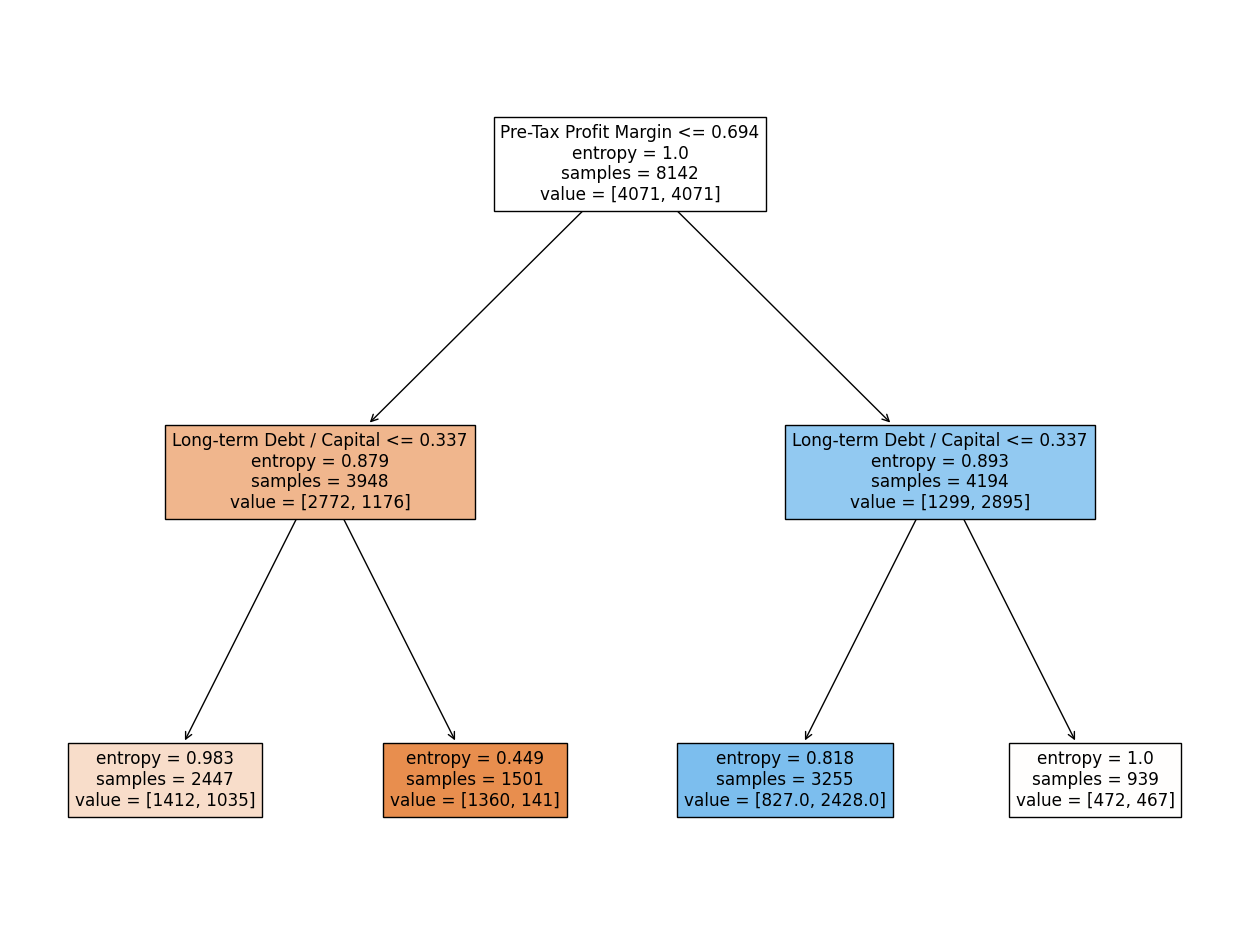

In [75]:
#visualize the tree
fig = plt.figure(figsize=(16,12))
_ = plot_tree(model,
              feature_names=X_train.columns,
              filled=True)

In [76]:
report = classification_report(Y_test, Y_pred, output_dict=True)
model_performance_summary.append({"Model":"Decision Tree",
                                  "accuracy_score": accuracy_score(Y_test, Y_pred),
                                  "balance_accuracy_score": balanced_accuracy_score(Y_test, Y_pred),
                                  "Precision of Junk": report['0']['precision'],
                                  "Recall of Junk": report['0']['recall'],
                                  "F1": report['0']['f1-score']})

### <b>Gaussian Naive Bayes </b>
<p> Gaussian Naive Bayes (NB) is a probabilistic classifier that applies Bayes' theorem with the assumption of independence between every pair of features. It can perform well when the features are independent or when the dependence between them is minimal. In this case, this assumption is often violated. Financial ratios can be highly correlated, affecting the performance of the model.

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
model = GaussianNB()
model.fit(X_train_scaled_resampled,Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
Y_pred = model.predict(X_test_scaled)

#evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.6899423446508648
0.5631310181704032
[[ 87 446]
 [ 38 990]]
              precision    recall  f1-score   support

           0       0.70      0.16      0.26       533
           1       0.69      0.96      0.80      1028

    accuracy                           0.69      1561
   macro avg       0.69      0.56      0.53      1561
weighted avg       0.69      0.69      0.62      1561



In [79]:
report = classification_report(Y_test, Y_pred, output_dict=True)
model_performance_summary.append({"Model":"Gaussian NB",
                                  "accuracy_score": accuracy_score(Y_test, Y_pred),
                                  "balance_accuracy_score": balanced_accuracy_score(Y_test, Y_pred),
                                  "Precision of Junk": report['0']['precision'],
                                  "Recall of Junk": report['0']['recall'],
                                  "F1": report['0']['f1-score']})

### <b> Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
#Try different hyperparameters by Grid Search Approach
max_depths = np.arange(1,10)
criterions = ["gini", "entropy", "log_loss"]
results =[]

for i in max_depths:
  for k in criterions:
    model = RandomForestClassifier(max_depth=i, criterion=k, random_state=100)
    model.fit(X_train_scaled_resampled, Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
    Y_pred = model.predict(X_test_scaled)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y_test, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                    'Precision of Junk': report['0']['precision'],
                    'Recall of Junk': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [82]:
results_df.sort_values(by=["Recall of Junk","Precision of Junk","balance_accuracy_score"],ascending=[False,False,False])

,Combination,accuracy_score,balance_accuracy_score,Precision of Junk,Recall of Junk,F1
25,"i=9, k=entropy",0.891095,0.869886,0.868154,0.803002,0.834308
26,"i=9, k=log_loss",0.891095,0.869886,0.868154,0.803002,0.834308
24,"i=9, k=gini",0.885330,0.865057,0.854000,0.801126,0.826718
21,"i=8, k=gini",0.872518,0.849457,0.838057,0.776735,0.806232
22,"i=8, k=entropy",0.868674,0.844732,0.833333,0.769231,0.800000
23,"i=8, k=log_loss",0.868674,0.844732,0.833333,0.769231,0.800000
18,"i=7, k=gini",0.857783,0.835109,0.809145,0.763602,0.785714
19,"i=7, k=entropy",0.850096,0.827465,0.794872,0.756098,0.775000
20,"i=7, k=log_loss",0.850096,0.827465,0.794872,0.756098,0.775000
15,"i=6, k=gini",0.832799,0.812526,0.758555,0.748593,0.753541


In [83]:
#the combination of i=9, k=entropy gives the best performance.

#create empty instance and fit to train dataset and use to predict the test dataset
model = RandomForestClassifier(max_depth=9, criterion='entropy', random_state=100)
model.fit(X_train_scaled_resampled,  Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
Y_pred = model.predict(X_test_scaled)

#evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.8910954516335682
0.869886152094086
[[428 105]
 [ 65 963]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       533
           1       0.90      0.94      0.92      1028

    accuracy                           0.89      1561
   macro avg       0.88      0.87      0.88      1561
weighted avg       0.89      0.89      0.89      1561



In [84]:
report = classification_report(Y_test, Y_pred, output_dict=True)
model_performance_summary.append({"Model":"Random Forest",
                                  "accuracy_score": accuracy_score(Y_test, Y_pred),
                                  "balance_accuracy_score": balanced_accuracy_score(Y_test, Y_pred),
                                  "Precision of Junk": report['0']['precision'],
                                  "Recall of Junk": report['0']['recall'],
                                  "F1": report['0']['f1-score']})

### <b> Gradient Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
#Try different hyperparameters by Grid Search Approach
losses = ["log_loss", "exponential"]
criterions = ["friedman_mse", "squared_error"]
results =[]

for i in losses:
  for k in criterions:
    model = GradientBoostingClassifier(loss=i, criterion=k, random_state=100)
    model.fit(X_train_scaled_resampled, Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
    Y_pred = model.predict(X_test_scaled)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y_test, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                    'Precision of Junk': report['0']['precision'],
                    'Recall of Junk': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [87]:
results_df.sort_values(by=["Recall of Junk","Precision of Junk","balance_accuracy_score"],ascending=[False,False,False])

,Combination,accuracy_score,balance_accuracy_score,Precision of Junk,Recall of Junk,F1
0,"i=log_loss, k=friedman_mse",0.845612,0.836256,0.757042,0.806754,0.781108
1,"i=log_loss, k=squared_error",0.845612,0.836256,0.757042,0.806754,0.781108
2,"i=exponential, k=friedman_mse",0.839846,0.829621,0.749559,0.797373,0.772727
3,"i=exponential, k=squared_error",0.839846,0.829621,0.749559,0.797373,0.772727


In [88]:
#the combination of i=log_loss, k=friedman_mse gives the best performance.

#create empty instance and fit to train dataset and use to predict the test dataset
model = GradientBoostingClassifier(loss="log_loss", criterion='friedman_mse', random_state=100)
model.fit(X_train_scaled_resampled,  Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
Y_pred = model.predict(X_test_scaled)

#evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.8456117873158232
0.8362564881260905
[[430 103]
 [138 890]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       533
           1       0.90      0.87      0.88      1028

    accuracy                           0.85      1561
   macro avg       0.83      0.84      0.83      1561
weighted avg       0.85      0.85      0.85      1561



In [89]:
report = classification_report(Y_test, Y_pred, output_dict=True)
model_performance_summary.append({"Model":"Gradient Boosting",
                                  "accuracy_score": accuracy_score(Y_test, Y_pred),
                                  "balance_accuracy_score": balanced_accuracy_score(Y_test, Y_pred),
                                  "Precision of Junk": report['0']['precision'],
                                  "Recall of Junk": report['0']['recall'],
                                  "F1": report['0']['f1-score']})

### <b> Support Vector Machines (SVM)

In [90]:
from sklearn.svm import SVC

In [91]:
#Try different hyperparameters by Grid Search Approach
kernels = ["linear", "poly","rbf","sigmoid"]
gammas = ["scale", "auto"]
results =[]

for i in kernels:
  for k in gammas:
    model = SVC(kernel=i, gamma=k, random_state=100)
    model.fit(X_train_scaled_resampled, Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
    Y_pred = model.predict(X_test_scaled)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y_test, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                    'Precision of Junk': report['0']['precision'],
                    'Recall of Junk': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [92]:
results_df.sort_values(by=["Recall of Junk","Precision of Junk","balance_accuracy_score"],ascending=[False,False,False])

,Combination,accuracy_score,balance_accuracy_score,Precision of Junk,Recall of Junk,F1
6,"i=sigmoid, k=scale",0.337604,0.494371,0.338907,0.988743,0.504789
2,"i=poly, k=scale",0.753363,0.744536,0.620130,0.716698,0.664926
0,"i=linear, k=scale",0.707239,0.690545,0.562914,0.637899,0.598065
1,"i=linear, k=auto",0.707239,0.690545,0.562914,0.637899,0.598065
4,"i=rbf, k=scale",0.709801,0.690683,0.567568,0.630394,0.597333
5,"i=rbf, k=auto",0.587444,0.580168,0.421277,0.557223,0.479806
3,"i=poly, k=auto",0.575913,0.568703,0.409283,0.545966,0.467846
7,"i=sigmoid, k=auto",0.575913,0.568251,0.409027,0.544090,0.466989


In [93]:
#the combination of i=poly, k=scale gives the best performance.

#create empty instance and fit to train dataset and use to predict the test dataset
model = SVC(kernel="poly", gamma="scale", random_state=100)
model.fit(X_train_scaled_resampled,  Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
Y_pred = model.predict(X_test_scaled)

#evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.7533632286995515
0.7445357385330813
[[382 151]
 [234 794]]
              precision    recall  f1-score   support

           0       0.62      0.72      0.66       533
           1       0.84      0.77      0.80      1028

    accuracy                           0.75      1561
   macro avg       0.73      0.74      0.73      1561
weighted avg       0.77      0.75      0.76      1561



In [94]:
report = classification_report(Y_test, Y_pred, output_dict=True)
model_performance_summary.append({"Model":"Support Vector Classifier",
                                  "accuracy_score": accuracy_score(Y_test, Y_pred),
                                  "balance_accuracy_score": balanced_accuracy_score(Y_test, Y_pred),
                                  "Precision of Junk": report['0']['precision'],
                                  "Recall of Junk": report['0']['recall'],
                                  "F1": report['0']['f1-score']})

## Compare all models & features importance

### Compare models
<p> Compare all models' performance, we have:
<ul>
    <li><b>KNN</b> has the highest recall for junk at 0.91, which means it correctly identifies 91% of the actual junk companies. It also has a high precision for junk at 0.83, which is a strong performance indicating that 83% of the companies it labels as junk are indeed junk.
    <li><b>Random Forest</b> also performs well with a recall for junk at 0.80 and precision for junk at 0.87. It correctly identifies 80% of the actual junk companies and has a slightly higher precision than KNN, which means it is more accurate in its positive (junk) predictions.
    <li><b>Gradient Boosting</b> is another strong contender, with a recall for junk at 0.81 and precision for junk at 0.76. Its recall is almost as high as Random Forest, but with a slight trade-off in precision.
</ul>
<p> Based on these considerations, <b>KNN</b> seems to be the best model as it has the highest recall for junk and also a very high precision for junk. This means it is the best at correctly identifying junk companies and not misclassifying investment-grade companies as junk.

However, we also consider the <b>Random Forest</b> model due to its nearly as high recall but higher precision, which could be a better choice if precision is considered equally important as recall, or if there is a high cost associated with false positives. Besides that, <b>interpretability is also important</b> because we want to find what most important indicators are, Random Forest can provide insights into feature importance, while KNN is more of a black-box model.

In [95]:
model_performance_summary_df = pd.DataFrame(model_performance_summary)
model_performance_summary_df

,Model,accuracy_score,balance_accuracy_score,Precision of Junk,Recall of Junk,F1
0,LogisticRegression,0.684177,0.677100,0.530395,0.654784,0.586062
1,K Nearest Neighbours,0.907111,0.907793,0.833333,0.909944,0.869955
2,Decision Tree,0.666240,0.700973,0.507042,0.810507,0.623827
3,Gaussian NB,0.689942,0.563131,0.696000,0.163227,0.264438
4,Random Forest,0.891095,0.869886,0.868154,0.803002,0.834308
5,Gradient Boosting,0.845612,0.836256,0.757042,0.806754,0.781108
6,Support Vector Classifier,0.753363,0.744536,0.620130,0.716698,0.664926


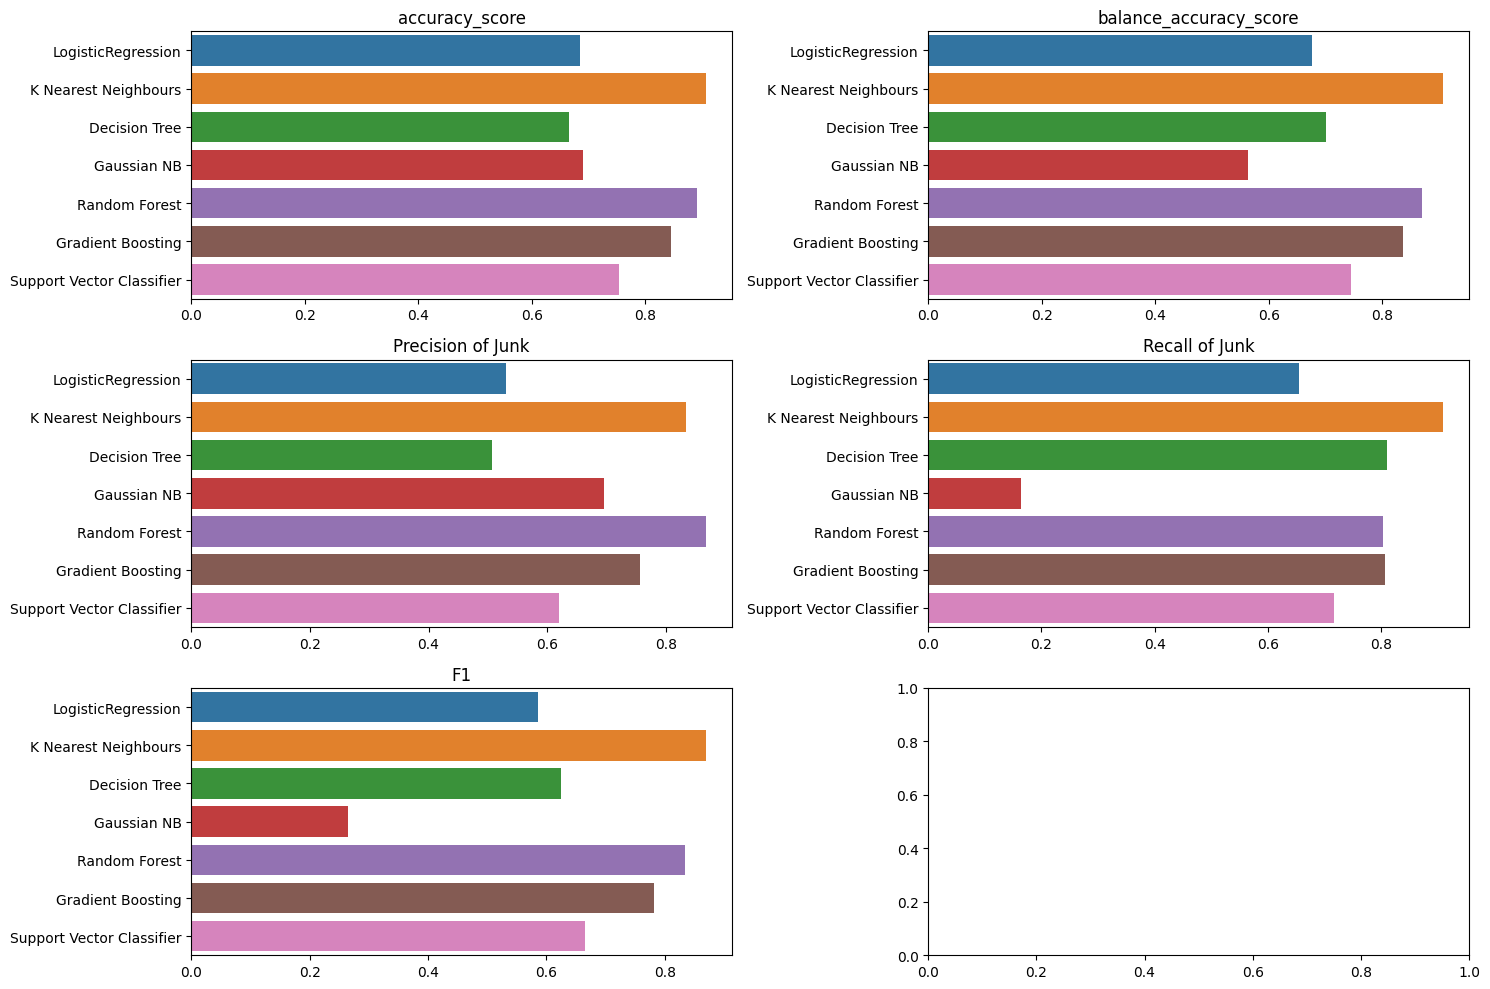

In [96]:
column_list = ["accuracy_score","balance_accuracy_score","Precision of Junk","Recall of Junk","F1"]

fig,axes=plt.subplots(3,2,figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(column_list):
  ax=axes[i]
  sns.barplot(data=model_performance_summary_df,y="Model",x=col,hue="Model",ax=ax)
  ax.set_title(col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

### Feature importance
<p> The chart shows feature importance generated from Random Forest model. The model places the more importance on long-term financial stability and profitability indicators. This suggests that from a financial perspective, managing debt levels relative to capital and maintaining profitability are key to a good credit rating. Less emphasis on cash flow metrics could indicate that these are less predictive for this specific outcome or the model may be underestimating the importance of liquidity and cash generation in assessing credit risk.

In [97]:
#This is the Random Forest model from previous step
model = RandomForestClassifier(max_depth=9, criterion='entropy', random_state=100)
model.fit(X_train_scaled_resampled,  Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings

# Get feature importances
importances = model.feature_importances_

# Map these importances to the corresponding feature names
features = X.columns
feature_importances = dict(zip(features, importances))

# Sort the feature importances in descending order
feature_importances_df = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance'])

# Print the sorted feature importances
feature_importances_df=feature_importances_df.sort_values(by="Importance", ascending=False)
feature_importances_df

,Feature,Importance
1,Long-term Debt / Capital,0.110717
7,Pre-Tax Profit Margin,0.107714
13,ROI - Return On Investment,0.091686
0,Current Ratio,0.082680
8,Net Profit Margin,0.074627
10,ROE - Return On Equity,0.072712
12,ROA - Return On Assets,0.069146
2,Debt/Equity Ratio,0.065102
3,Gross Margin,0.054025
9,Asset Turnover,0.051222


In [98]:
fig=px.bar(feature_importances_df.sort_values(by="Importance", ascending=True), y="Feature", x="Importance", template="simple_white", title="Figures Importance")
fig.show()

## Enhance model performance with Cross Validation and Feature Selections

<p> From the initial model developement stage. We decide to enhance these model performance by Cross Validation and Feature Selections. Cross validation with feature selection help to avoid bias of traditional single split and to optimize and simplify model by choosing the most important features.

<p> Overall, the application of FS & CV has led to improvements in the accuracy of some models, notably Logistic Regression and Decision Tree, while others have seen a slight reduction in accuracy, like KNN and Random Forest. The application of FS & CV also tends to increase the precision of the models, making them more reliable when they predict a company as junk. However, this often comes at the cost of recall, especially for Logistic Regression, which now misses many junk companies it used to identify.
<ul>
    <li><b>Overfitting Reduction</b>: The original models without feature selection may have been overfitting the training data by learning noise along with the signal. Feature selection helps in reducing overfitting by eliminating irrelevant or less important features, leading to a decrease in performance on the training set but potentially increasing the model's ability to generalize to new, unseen data.
    <li><b>Cross-Validation Variance</b>: Cross-validation provides a more accurate estimate of a model's predictive performance on an independent dataset. It does this by training and evaluating the model multiple times on different subsets of the data. The initial higher performance might have been optimistic, and cross-validation reveals a more realistic, often lower, performance level.
    <li><b>Simpler Model</b>: Feature selection can result in a simpler model with fewer variables. While this generally improves model interpretability and can reduce computation time, it might also lead to a loss of information if relevant predictors are removed, which can negatively affect the model's performance.
</ul>

In [99]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import make_pipeline
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [100]:
model_performance_summary_cv = []

### <b>Logistics Regression

In [101]:
# Comment out to save run time
# pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=100))

# sfs = SFS(pipeline,
#            k_features=len(X.columns),
#            forward=True,
#            floating=False,
#            verbose=1,
#            scoring="balanced_accuracy",
#            cv=KFold(n_splits=5,random_state=100,shuffle=True))

# sfs = sfs.fit(X.to_numpy(), Y.values.ravel())

# sfs.subsets_

In [102]:
#Feature selection: 16: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16)
X.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]]

Index(['Current Ratio', 'Long-term Debt / Capital', 'Debt/Equity Ratio',
       'Gross Margin', 'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'Return On Tangible Equity', 'ROA - Return On Assets',
       'ROI - Return On Investment', 'Operating Cash Flow Per Share',
       'Free Cash Flow Per Share', 'Financial Performance'],
      dtype='object')

In [103]:
pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=100))
Y_pred = cross_val_predict(pipeline,
                           X[X.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]]],
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.702498398462524
0.5864756244684878
[[ 563 2143]
 [ 179 4920]]
              precision    recall  f1-score   support

           0       0.76      0.21      0.33      2706
           1       0.70      0.96      0.81      5099

    accuracy                           0.70      7805
   macro avg       0.73      0.59      0.57      7805
weighted avg       0.72      0.70      0.64      7805



In [104]:
report = classification_report(Y, Y_pred, output_dict=True)
model_performance_summary_cv.append({"Model":"LogisticRegression",
                                  "accuracy_score_cv": accuracy_score(Y, Y_pred),
                                  "balance_accuracy_score_cv": balanced_accuracy_score(Y, Y_pred),
                                  "Precision of Junk_cv": report['0']['precision'],
                                  "Recall of Junk_cv": report['0']['recall'],
                                  "F1_cv": report['0']['f1-score']})

### <b>K Nearest Neighbours

In [105]:
# Comment out to save run time
# pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=2, metric="minkowski",weights="uniform"))

# sfs = SFS(pipeline,
#            k_features=len(X.columns),
#            forward=True,
#            floating=False,
#            verbose=1,
#            scoring='balanced_accuracy',
#            cv=KFold(n_splits=5,random_state=100,shuffle=True))

# sfs = sfs.fit(X.to_numpy(), Y.values.ravel())

# sfs.subsets_

In [106]:
#Feature selection: 13: {'feature_idx': (0, 1, 2, 3, 6, 7, 8, 9, 10, 12, 13, 14, 16)
X.columns[[0, 1, 2, 3, 6, 7, 8, 9, 10, 12, 13, 14, 16]]

Index(['Current Ratio', 'Long-term Debt / Capital', 'Debt/Equity Ratio',
       'Gross Margin', 'EBITDA Margin', 'Pre-Tax Profit Margin',
       'Net Profit Margin', 'Asset Turnover', 'ROE - Return On Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Financial Performance'],
      dtype='object')

In [107]:
pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=2, metric="canberra", weights="uniform"))
Y_pred = cross_val_predict(pipeline,
                           X[X.columns[[0, 1, 2, 3, 6, 7, 8, 9, 10, 12, 13, 14, 16]]],
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.8835361947469571
0.8853703326029321
[[2412  294]
 [ 615 4484]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      2706
           1       0.94      0.88      0.91      5099

    accuracy                           0.88      7805
   macro avg       0.87      0.89      0.87      7805
weighted avg       0.89      0.88      0.88      7805



In [108]:
report = classification_report(Y, Y_pred, output_dict=True)
model_performance_summary_cv.append({"Model":"K Nearest Neighbours",
                                  "accuracy_score_cv": accuracy_score(Y, Y_pred),
                                  "balance_accuracy_score_cv": balanced_accuracy_score(Y, Y_pred),
                                  "Precision of Junk_cv": report['0']['precision'],
                                  "Recall of Junk_cv": report['0']['recall'],
                                  "F1_cv": report['0']['f1-score']})

### <b> Decision Tree

In [109]:
# Comment out to save run time
# pipeline = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=2, criterion='entropy',random_state=100))

# sfs = SFS(pipeline,
#            k_features=len(X.columns),
#            forward=True,
#            floating=False,
#            verbose=1,
#            scoring='balanced_accuracy',
#            cv=KFold(n_splits=5,random_state=100,shuffle=True))

# sfs = sfs.fit(X.to_numpy(), Y.values.ravel())

# sfs.subsets_

In [110]:
#Feature selection: 2: {'feature_idx': (1, 13)
X.columns[[1, 13]]

Index(['Long-term Debt / Capital', 'ROI - Return On Investment'], dtype='object')

In [111]:
pipeline = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=100))
Y_pred = cross_val_predict(pipeline,
                           X[X.columns[[1, 13]]],
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.739654067905189
0.7008482598866175
[[1554 1152]
 [ 880 4219]]
              precision    recall  f1-score   support

           0       0.64      0.57      0.60      2706
           1       0.79      0.83      0.81      5099

    accuracy                           0.74      7805
   macro avg       0.71      0.70      0.71      7805
weighted avg       0.73      0.74      0.74      7805



In [112]:
report = classification_report(Y, Y_pred, output_dict=True)
model_performance_summary_cv.append({"Model":"Decision Tree",
                                  "accuracy_score_cv": accuracy_score(Y, Y_pred),
                                  "balance_accuracy_score_cv": balanced_accuracy_score(Y, Y_pred),
                                  "Precision of Junk_cv": report['0']['precision'],
                                  "Recall of Junk_cv": report['0']['recall'],
                                  "F1_cv": report['0']['f1-score']})

### <b> Gaussian Naive Bayes

In [113]:
# Comment out to save run time
# pipeline = make_pipeline(MinMaxScaler(), GaussianNB())

# sfs = SFS(pipeline,
#            k_features=len(X.columns),
#            forward=True,
#            floating=False,
#            verbose=1,
#            scoring='balanced_accuracy',
#            cv=KFold(n_splits=5,random_state=100,shuffle=True))

# sfs = sfs.fit(X.to_numpy(), Y.values.ravel())

# sfs.subsets_

In [114]:
#Feature selection: 6: {'feature_idx': (3, 9, 10, 11, 12, 16)
X.columns[[3, 9, 10, 11, 12, 16]]

Index(['Gross Margin', 'Asset Turnover', 'ROE - Return On Equity',
       'Return On Tangible Equity', 'ROA - Return On Assets',
       'Financial Performance'],
      dtype='object')

In [115]:
pipeline = make_pipeline(MinMaxScaler(), GaussianNB())
Y_pred = cross_val_predict(pipeline,
                           X[X.columns[[3, 9, 10, 11, 12, 16]]],
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.6922485586162717
0.6330019639229001
[[1190 1516]
 [ 886 4213]]
              precision    recall  f1-score   support

           0       0.57      0.44      0.50      2706
           1       0.74      0.83      0.78      5099

    accuracy                           0.69      7805
   macro avg       0.65      0.63      0.64      7805
weighted avg       0.68      0.69      0.68      7805



In [116]:
report = classification_report(Y, Y_pred, output_dict=True)
model_performance_summary_cv.append({"Model":"Gaussian NB",
                                  "accuracy_score_cv": accuracy_score(Y, Y_pred),
                                  "balance_accuracy_score_cv": balanced_accuracy_score(Y, Y_pred),
                                  "Precision of Junk_cv": report['0']['precision'],
                                  "Recall of Junk_cv": report['0']['recall'],
                                  "F1_cv": report['0']['f1-score']})

### <b> Random Forest

In [117]:
# Comment out to save run time
# pipeline = make_pipeline(MinMaxScaler(), RandomForestClassifier(max_depth=9, criterion="entropy",random_state=100))

# sfs = SFS(pipeline,
#            k_features=len(X.columns),
#            forward=True,
#            floating=False,
#            verbose=1,
#            scoring='balanced_accuracy',
#            cv=KFold(n_splits=5,random_state=100,shuffle=True))

# sfs = sfs.fit(X.to_numpy(), Y.values.ravel())

# sfs.subsets_

In [118]:
#Feature selection: 9: {'feature_idx': ((0, 1, 3, 6, 7, 9, 10, 11, 16))
X.columns[[0, 1, 3, 6, 7, 9, 10, 11, 16]]

Index(['Current Ratio', 'Long-term Debt / Capital', 'Gross Margin',
       'EBITDA Margin', 'Pre-Tax Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'Financial Performance'],
      dtype='object')

In [119]:
pipeline = make_pipeline(MinMaxScaler(), RandomForestClassifier(max_depth=9, criterion="entropy", random_state=100))
Y_pred = cross_val_predict(pipeline,
                           X[X.columns[[0, 1, 3, 6, 7, 9, 10, 11, 16]]],
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.8845611787315824
0.850254321420356
[[1998  708]
 [ 193 4906]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      2706
           1       0.87      0.96      0.92      5099

    accuracy                           0.88      7805
   macro avg       0.89      0.85      0.87      7805
weighted avg       0.89      0.88      0.88      7805



In [120]:
report = classification_report(Y, Y_pred, output_dict=True)
model_performance_summary_cv.append({"Model":"Random Forest",
                                  "accuracy_score_cv": accuracy_score(Y, Y_pred),
                                  "balance_accuracy_score_cv": balanced_accuracy_score(Y, Y_pred),
                                  "Precision of Junk_cv": report['0']['precision'],
                                  "Recall of Junk_cv": report['0']['recall'],
                                  "F1_cv": report['0']['f1-score']})

### <b> Gradient Boosting

In [121]:
# Comment out to save run time
# pipeline = make_pipeline(MinMaxScaler(), GradientBoostingClassifier(loss="log_loss", criterion='friedman_mse',random_state=100))

# sfs = SFS(pipeline,
#            k_features=len(X.columns),
#            forward=True,
#            floating=False,
#            verbose=1,
#            scoring='balanced_accuracy',
#            cv=KFold(n_splits=5,random_state=100,shuffle=True))

# sfs = sfs.fit(X.to_numpy(), Y.values.ravel())

# sfs.subsets_

In [122]:
#Feature selection: 16: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16)
X.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16]]

Index(['Current Ratio', 'Long-term Debt / Capital', 'Debt/Equity Ratio',
       'Gross Margin', 'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Free Cash Flow Per Share', 'Financial Performance'],
      dtype='object')

In [123]:
pipeline = make_pipeline(MinMaxScaler(), GradientBoostingClassifier(loss="log_loss", criterion='friedman_mse', random_state=100))
Y_pred = cross_val_predict(pipeline,
                           X[X.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16]]],
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.8516335682254965
0.8157746754685896
[[1891  815]
 [ 343 4756]]
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      2706
           1       0.85      0.93      0.89      5099

    accuracy                           0.85      7805
   macro avg       0.85      0.82      0.83      7805
weighted avg       0.85      0.85      0.85      7805



In [124]:
report = classification_report(Y, Y_pred, output_dict=True)
model_performance_summary_cv.append({"Model":"Gradient Boosting",
                                  "accuracy_score_cv": accuracy_score(Y, Y_pred),
                                  "balance_accuracy_score_cv": balanced_accuracy_score(Y, Y_pred),
                                  "Precision of Junk_cv": report['0']['precision'],
                                  "Recall of Junk_cv": report['0']['recall'],
                                  "F1_cv": report['0']['f1-score']})

### <b> Compare performance after Cross Validation and Feature Selection

In [125]:
df1=pd.DataFrame(model_performance_summary).T.reset_index()
df1.columns=df1.iloc[0]
df1=df1.drop(df1.index[0])
df1=df1.rename(columns={"Model":"Measure"})
df1

,Measure,LogisticRegression,K Nearest Neighbours,Decision Tree,Gaussian NB,Random Forest,Gradient Boosting,Support Vector Classifier
1,accuracy_score,0.684177,0.907111,0.66624,0.689942,0.891095,0.845612,0.753363
2,balance_accuracy_score,0.6771,0.907793,0.700973,0.563131,0.869886,0.836256,0.744536
3,Precision of Junk,0.530395,0.833333,0.507042,0.696,0.868154,0.757042,0.62013
4,Recall of Junk,0.654784,0.909944,0.810507,0.163227,0.803002,0.806754,0.716698
5,F1,0.586062,0.869955,0.623827,0.264438,0.834308,0.781108,0.664926


In [126]:
df2=pd.DataFrame(model_performance_summary_cv).T.reset_index()
df2.columns=df2.iloc[0]
df2=df2.drop(df2.index[0])
df2=df2.rename(columns={"Model":"Measure"})
df2

,Measure,LogisticRegression,K Nearest Neighbours,Decision Tree,Gaussian NB,Random Forest,Gradient Boosting
1,accuracy_score_cv,0.702498,0.883536,0.739654,0.692249,0.884561,0.851634
2,balance_accuracy_score_cv,0.586476,0.88537,0.700848,0.633002,0.850254,0.815775
3,Precision of Junk_cv,0.75876,0.796829,0.638455,0.573218,0.911912,0.846464
4,Recall of Junk_cv,0.208056,0.891353,0.574279,0.439763,0.738359,0.698817
5,F1_cv,0.326566,0.841444,0.604669,0.4977,0.81601,0.765587


In [127]:
pd.DataFrame(model_performance_summary_cv)

,Model,accuracy_score_cv,balance_accuracy_score_cv,Precision of Junk_cv,Recall of Junk_cv,F1_cv
0,LogisticRegression,0.702498,0.586476,0.758760,0.208056,0.326566
1,K Nearest Neighbours,0.883536,0.885370,0.796829,0.891353,0.841444
2,Decision Tree,0.739654,0.700848,0.638455,0.574279,0.604669
3,Gaussian NB,0.692249,0.633002,0.573218,0.439763,0.497700
4,Random Forest,0.884561,0.850254,0.911912,0.738359,0.816010
5,Gradient Boosting,0.851634,0.815775,0.846464,0.698817,0.765587


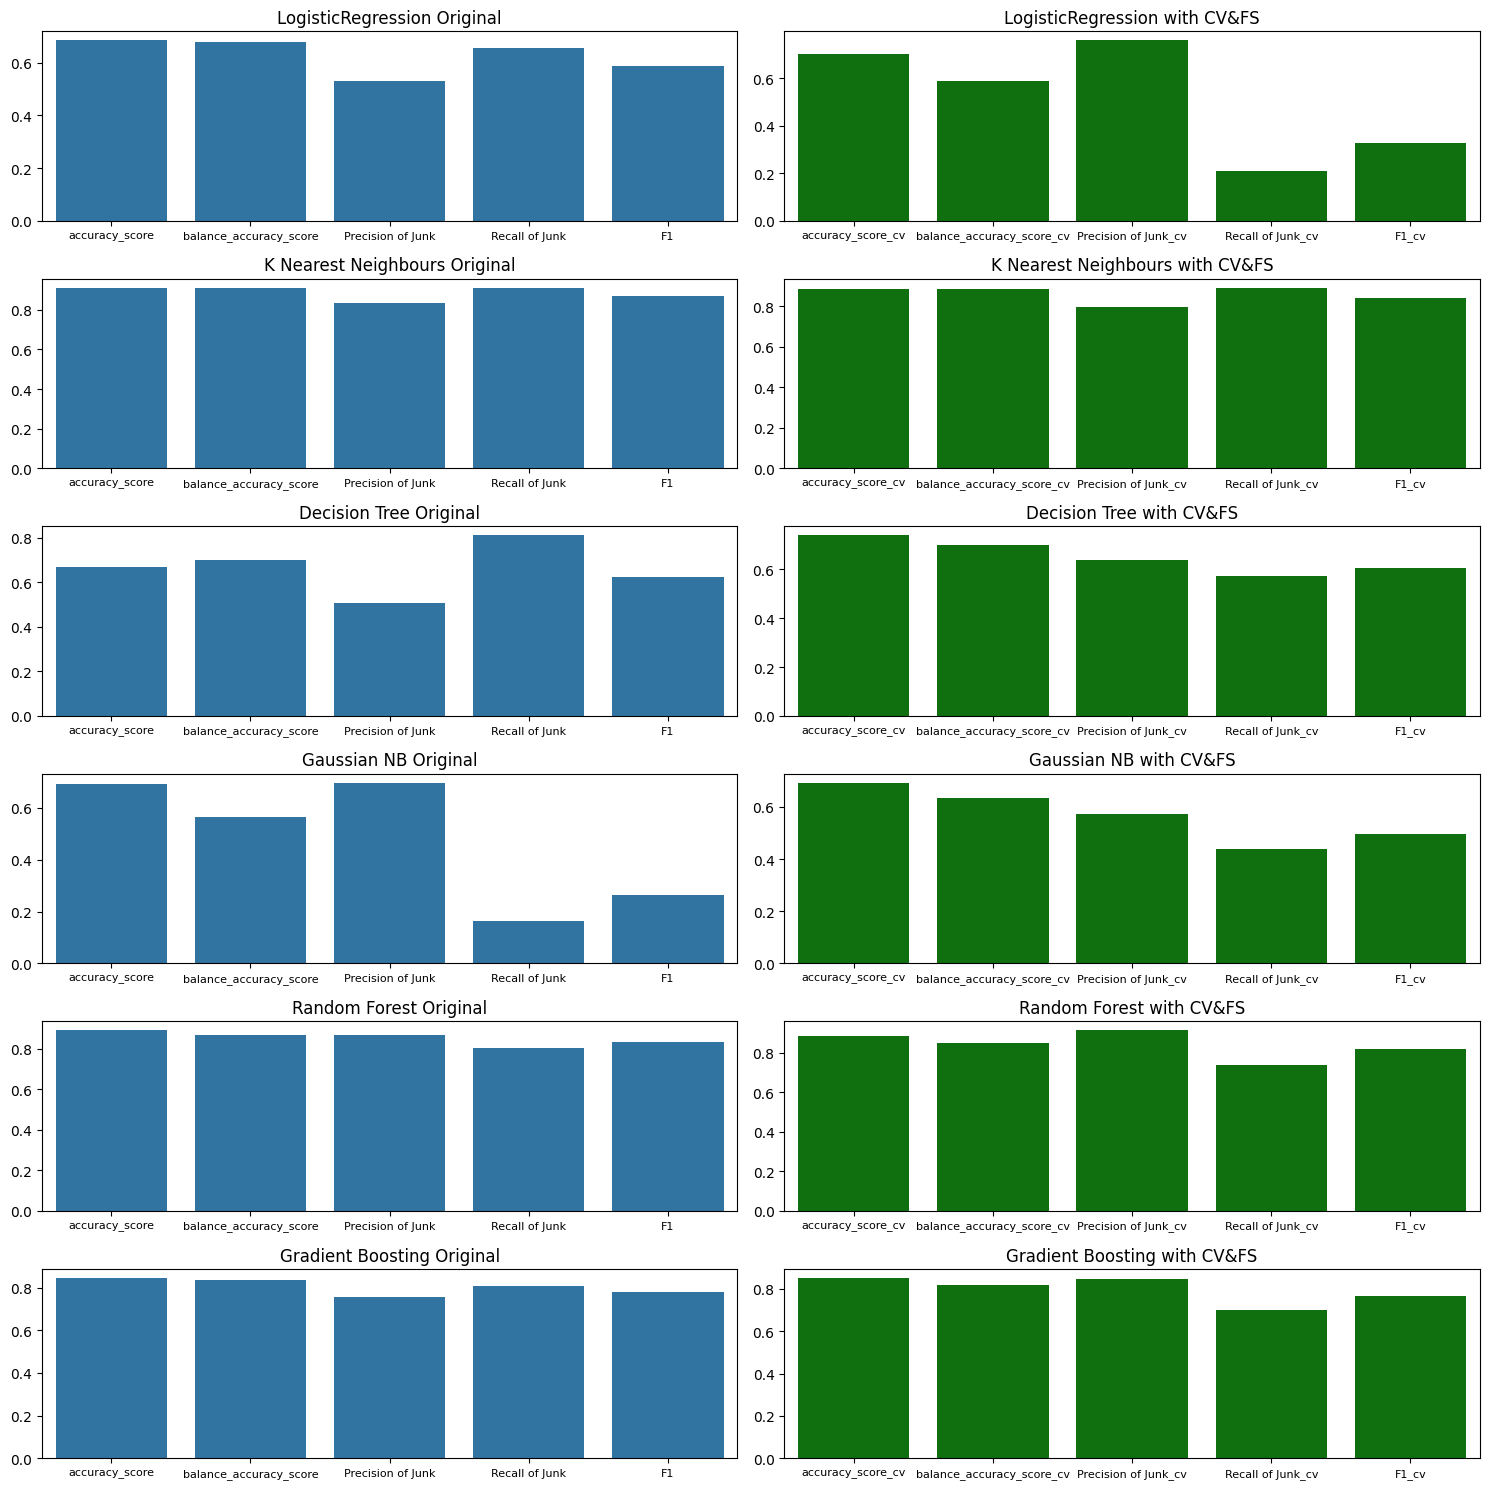

In [128]:
#Support Vector Classifier takes too much time for Cross Validation and Feature Selection so we do not compare this model
models = ["LogisticRegression","K Nearest Neighbours","Decision Tree","Gaussian NB","Random Forest","Gradient Boosting"]

fig,axes=plt.subplots(6,2,figsize=(15,15))
axes = axes.flatten()

for i, model in enumerate(models):
    ax=axes[i*2]
    sns.barplot(data=df1,x="Measure",y=model,ax=ax)
    ax.set_title(f"{model} Original")
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax=axes[i*2+1]
    sns.barplot(data=df2,x="Measure",y=model,ax=ax,color="green")
    ax.set_title(f"{model} with CV&FS")
    ax.set_xlabel("")
    ax.set_ylabel("")

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_fontsize(8)
    
plt.tight_layout()
plt.show()

### <b> Support Vector Machines 

In [129]:
# Comment out to save run time

# pipeline = make_pipeline(MinMaxScaler(), SVC(kernel="poly", gamma="scale",random_state=100))

# sfs = SFS(pipeline,
#            k_features=len(X.columns),
#            forward=True,
#            floating=False,
#            verbose=1,
#            scoring='balanced_accuracy',
#            cv=KFold(n_splits=5,random_state=100,shuffle=True))

# sfs = sfs.fit(X.to_numpy(), Y.values.ravel())

# sfs.subsets_

In [130]:
# #Feature selection: 16: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16)
# X.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16]]

In [131]:
# pipeline = make_pipeline(MinMaxScaler(), SVC(kernel="poly", gamma="scale", random_state=100))
# Y_pred = cross_val_predict(pipeline,
#                            X[X.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16]]],
#                            Y.values.ravel(),
#                            cv=KFold(n_splits=5,random_state=100,shuffle=True))
# print(accuracy_score(Y,Y_pred))
# print(balanced_accuracy_score(Y,Y_pred))
# print(confusion_matrix(Y,Y_pred))
# print(classification_report(Y,Y_pred))

In [132]:
# report = classification_report(Y, Y_pred, output_dict=True)
# model_performance_summary_cv.append({"Model":"Support Vector Classifier",
#                                   "accuracy_score_cv": accuracy_score(Y, Y_pred),
#                                   "balance_accuracy_score_cv": balanced_accuracy_score(Y, Y_pred),
#                                   "Precision of Junk_cv": report['0']['precision'],
#                                   "Recall of Junk_cv": report['0']['recall'],
#                                   "F1_cv": report['0']['f1-score']})

## Conclusion